## Environment Setup: Install Dependencies & Version Check

Run the next cell **once at the start** of this notebook (if needed). It will:
1. Install required packages
2. Verify installed versions satisfy the requirements

If the check fails, stop and fix the reported packages before running the rest of the notebook.

In [6]:
# Install required packages (only needed if not already installed)
# Uncomment if running in a new environment
!pip install -r requirements.txt

# Dreaddit Dataset

## Exploring LIWC and DAL Features for Stress Detection

This Section explores the linguistic features (LIWC) and affective features (DAL) in the Dreaddit dataset to understand how they relate to stress signals in social media text.

### 1. Import Libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


### 2. Load the Dataset

In [31]:
# Load the training dataset
df_train = pd.read_csv('data/dreaddit-train.csv')
df_test = pd.read_csv('data/dreaddit-test.csv')

print(f"Train Dataset shape: {df_train.shape}")
print(f"Test Dataset shape: {df_test.shape}")
print(f"\nTrain Label distribution:")
print(df_train['label'].value_counts())
print(f"\nStress rate: {df_train['label'].mean()*100:.2f}%")
print(f"No Stress rate: {(1-df_train['label'].mean())*100:.2f}%")

Train Dataset shape: (2838, 116)
Test Dataset shape: (715, 116)

Train Label distribution:
label
1    1488
0    1350
Name: count, dtype: int64

Stress rate: 52.43%
No Stress rate: 47.57%


### 3. Dataset Overview

#### 3.1 Basic Information

In [32]:
# Basic information
print("Dataset Info:")
print(df_train.info())

Dataset Info:
<class 'pandas.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Columns: 116 entries, subreddit to sentiment
dtypes: float64(106), int64(6), str(4)
memory usage: 3.8 MB
None


#### 3.2 Check for missing values 

In [33]:
# Check for missing values
missing = df_train.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

if len(missing) > 0:
    print("Missing values:")
    print(missing)
else:
    print("No missing values found!")

No missing values found!


#### 3.3 Subreddit post distribution

Posts per subreddit:
subreddit
ptsd                584
relationships       552
anxiety             503
domesticviolence    316
assistance          289
survivorsofabuse    245
homeless            168
almosthomeless       80
stress               64
food_pantry          37
Name: count, dtype: int64


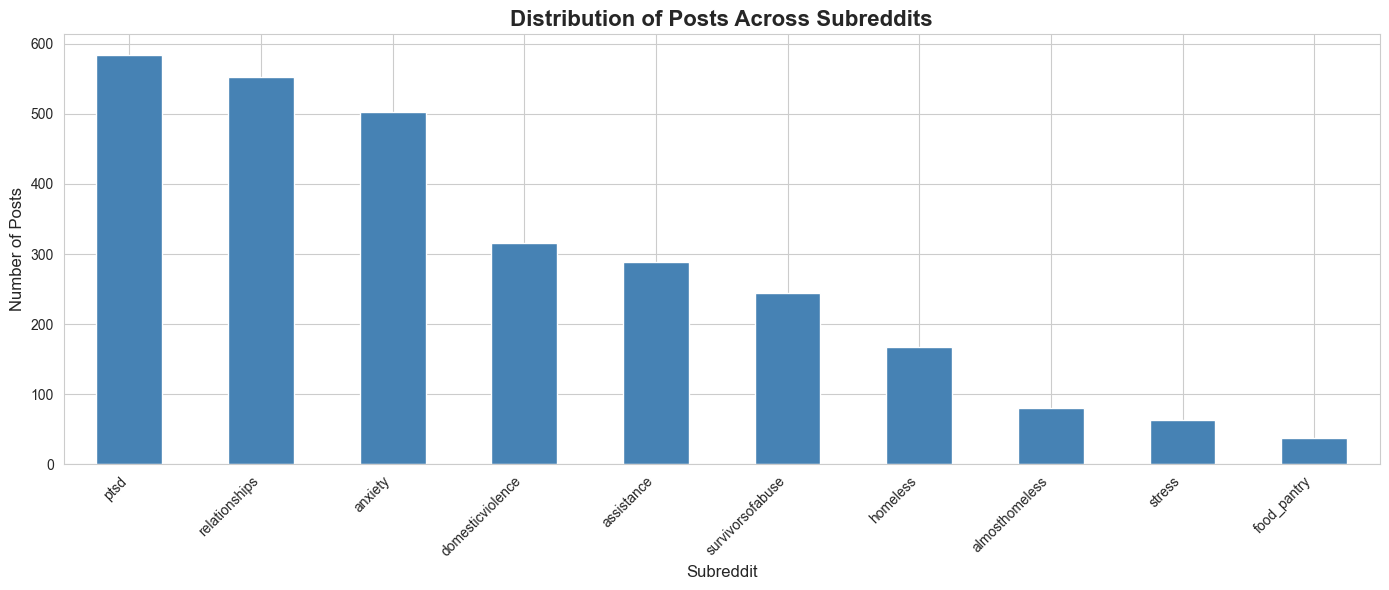

In [34]:
# Subreddit distribution
print("Posts per subreddit:")
print(df_train['subreddit'].value_counts())

# Visualize subreddit distribution
plt.figure(figsize=(14, 6))
df_train['subreddit'].value_counts().plot(kind='bar', color='steelblue')
plt.title('Distribution of Posts Across Subreddits', fontsize=16, fontweight='bold')
plt.xlabel('Subreddit', fontsize=12)
plt.ylabel('Number of Posts', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### 3.4 Stress rate by Subreddit


Stress rate by subreddit:
                  Stress_Rate  Count
subreddit                           
anxiety              0.658052    503
domesticviolence     0.639241    316
almosthomeless       0.587500     80
ptsd                 0.568493    584
stress               0.546875     64
survivorsofabuse     0.457143    245
relationships        0.447464    552
food_pantry          0.378378     37
homeless             0.375000    168
assistance           0.363322    289


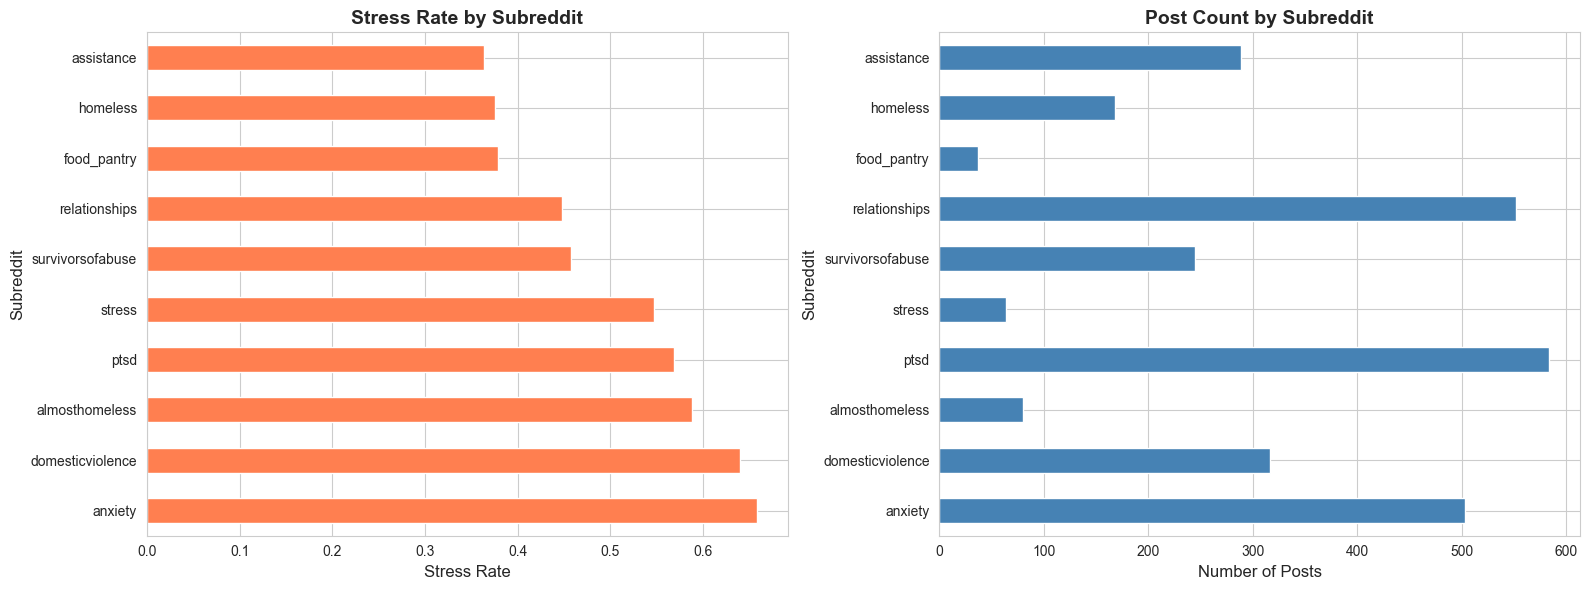

In [35]:
# Stress labels by subreddit
stress_by_sub = df_train.groupby('subreddit')['label'].agg(['mean', 'count']).sort_values('mean', ascending=False)
stress_by_sub.columns = ['Stress_Rate', 'Count']
print("\nStress rate by subreddit:")
print(stress_by_sub)

# Visualize Stress Rate and Post Count by Subreddit side by side
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

stress_by_sub['Stress_Rate'].plot(kind='barh', ax=ax[0], color='coral')
ax[0].set_title('Stress Rate by Subreddit', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Stress Rate', fontsize=12)
ax[0].set_ylabel('Subreddit', fontsize=12)

stress_by_sub['Count'].plot(kind='barh', ax=ax[1], color='steelblue')
ax[1].set_title('Post Count by Subreddit', fontsize=14, fontweight='bold')
ax[1].set_xlabel('Number of Posts', fontsize=12)
ax[1].set_ylabel('Subreddit', fontsize=12)

plt.tight_layout()
plt.show()

### 4. LIWC Features Exploration

LIWC (Linguistic Inquiry and Word Count) features capture various linguistic and psychological dimensions. They are mostly expressed as a percentage of total words in a given text. We will explore certain LIWC features that may be correlated with stress.

In [36]:
# Extract LIWC columns
liwc_cols = [col for col in df_train.columns if col.startswith('lex_liwc_')]
print(f"Total LIWC features: {len(liwc_cols)}")
print(f"\nLIWC feature categories:")
print(liwc_cols[:20])  # Show first 20

Total LIWC features: 93

LIWC feature categories:
['lex_liwc_WC', 'lex_liwc_Analytic', 'lex_liwc_Clout', 'lex_liwc_Authentic', 'lex_liwc_Tone', 'lex_liwc_WPS', 'lex_liwc_Sixltr', 'lex_liwc_Dic', 'lex_liwc_function', 'lex_liwc_pronoun', 'lex_liwc_ppron', 'lex_liwc_i', 'lex_liwc_we', 'lex_liwc_you', 'lex_liwc_shehe', 'lex_liwc_they', 'lex_liwc_ipron', 'lex_liwc_article', 'lex_liwc_prep', 'lex_liwc_auxverb']


#### 4.1 Summary Variables (Analytic, Clout, Authentic, Tone)
Each of the summary measures are algorithms derived from various LIWC variables based on previous empirical research. They are stored as percentile values.

LIWC Summary Variables by Stress Label:
       lex_liwc_Analytic  lex_liwc_Clout  lex_liwc_Authentic  lex_liwc_Tone
label                                                                      
0              42.134000       54.336941           57.543104      49.599704
1              28.987157       28.801216           75.664241      18.756391


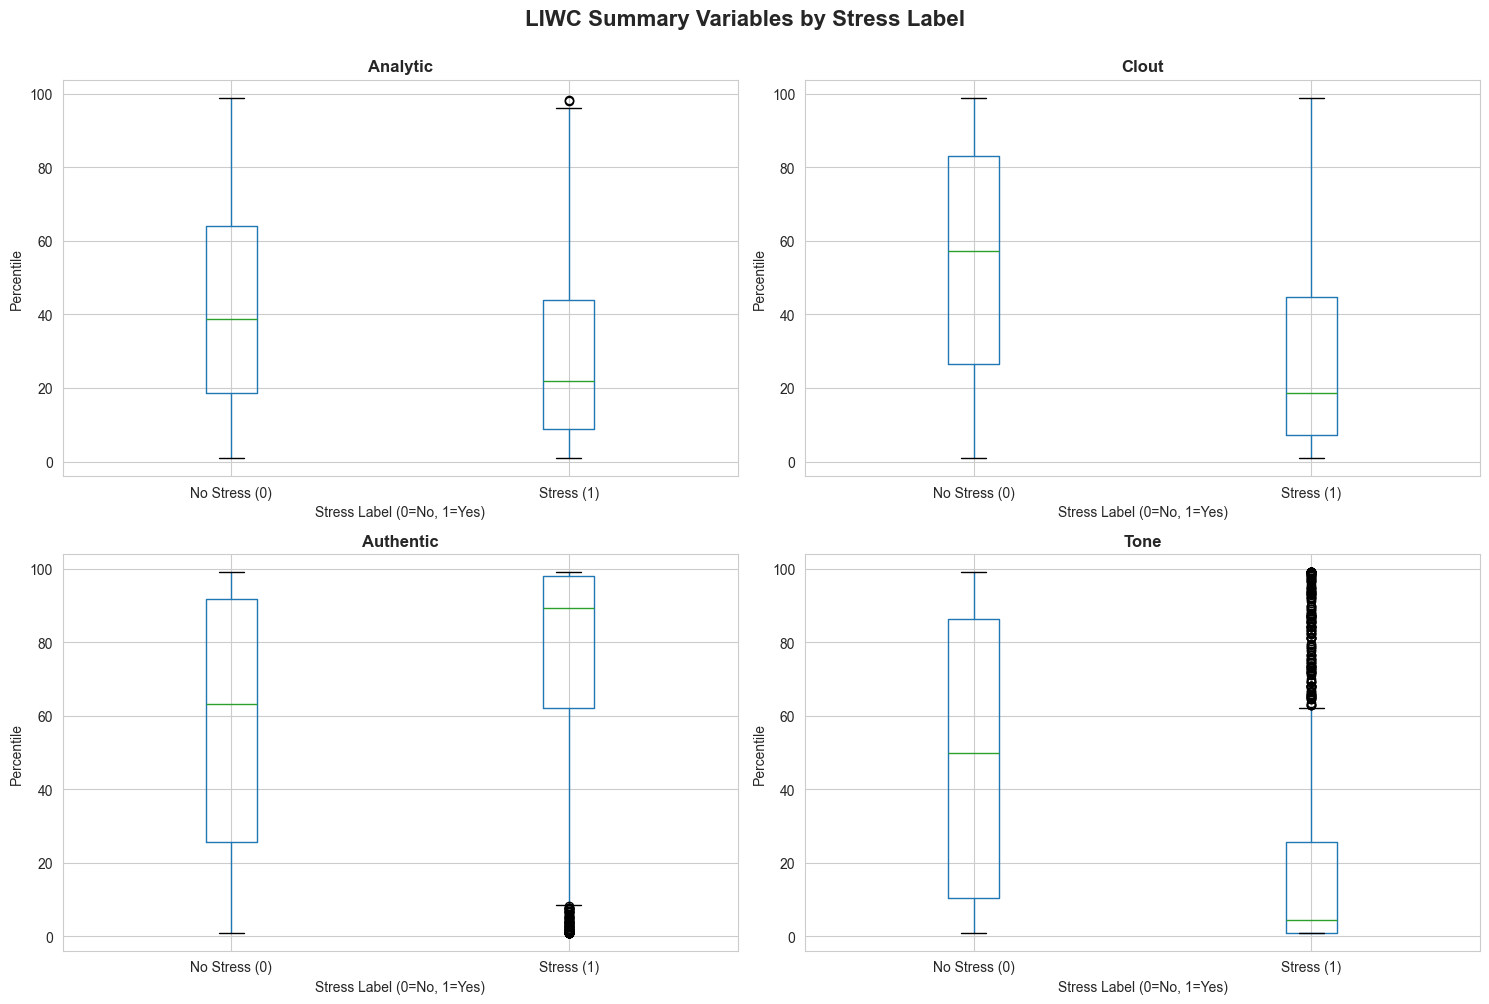

In [37]:
# Summary variables
summary_vars = ['lex_liwc_Analytic', 'lex_liwc_Clout', 'lex_liwc_Authentic', 'lex_liwc_Tone']

# Statistics by stress label
summary_stats = df_train.groupby('label')[summary_vars].mean()
print("LIWC Summary Variables by Stress Label:")
print(summary_stats)

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for idx, var in enumerate(summary_vars):
    df_train.boxplot(column=var, by='label', ax=axes[idx])
    axes[idx].set_title(f'{var.replace("lex_liwc_", "")}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Stress Label (0=No, 1=Yes)', fontsize=10)
    axes[idx].set_ylabel('Percentile', fontsize=10)
    plt.sca(axes[idx])
    plt.xticks([1, 2], ['No Stress (0)', 'Stress (1)'])

plt.suptitle('LIWC Summary Variables by Stress Label', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

#### 4.2 Emotional and Affective Features


Emotional LIWC Features by Stress Label:
       lex_liwc_affect  lex_liwc_posemo  lex_liwc_negemo  lex_liwc_anx  \
label                                                                    
0             5.579644         3.419896         2.074133      0.513163   
1             6.567137         2.042789         4.421203      1.278038   

       lex_liwc_anger  lex_liwc_sad  
label                                
0            0.595830      0.373104  
1            1.230383      0.802903  


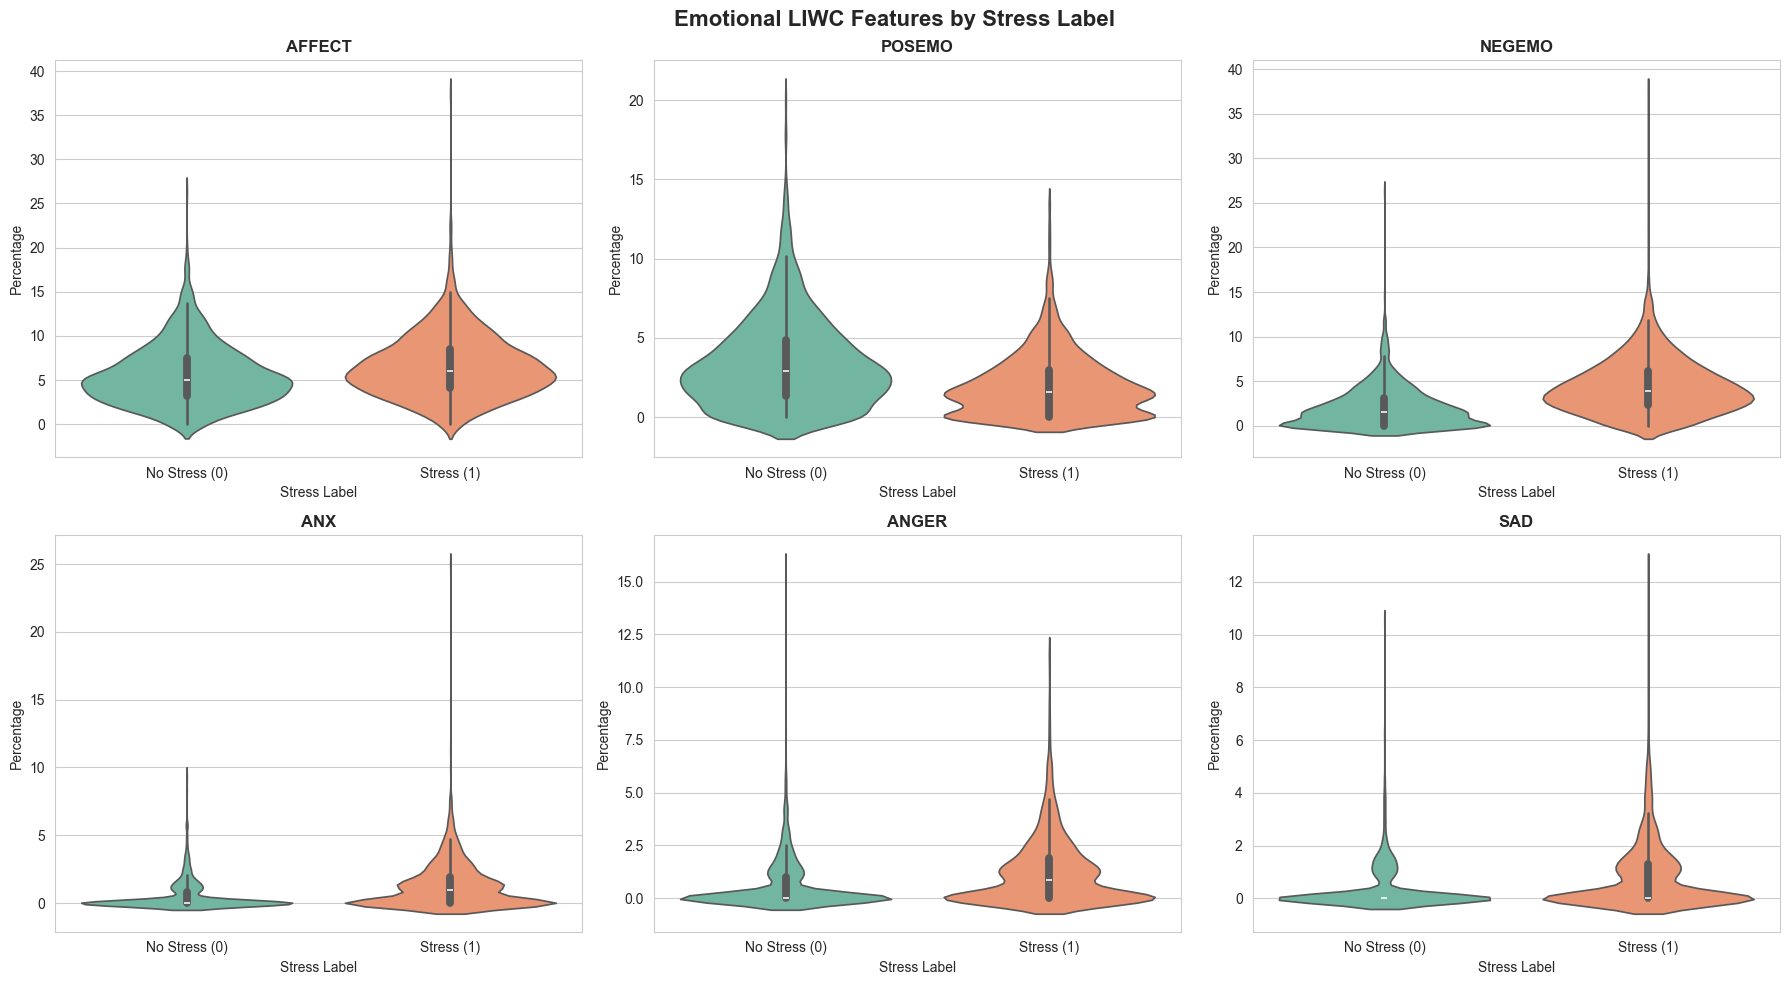

In [38]:
# Emotional features
emotion_vars = ['lex_liwc_affect', 'lex_liwc_posemo', 'lex_liwc_negemo', 
                'lex_liwc_anx', 'lex_liwc_anger', 'lex_liwc_sad']

# Statistics
emotion_stats = df_train.groupby('label')[emotion_vars].mean()
print("\nEmotional LIWC Features by Stress Label:")
print(emotion_stats)

# Visualize
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, var in enumerate(emotion_vars):
    # Violin plot for better distribution visualization
    sns.violinplot(data=df_train, x='label', y=var, ax=axes[idx], palette='Set2')
    axes[idx].set_title(f'{var.replace("lex_liwc_", "").upper()}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Stress Label', fontsize=10)
    axes[idx].set_ylabel('Percentage', fontsize=10)
    axes[idx].set_xticklabels(['No Stress (0)', 'Stress (1)'])

plt.suptitle('Emotional LIWC Features by Stress Label', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

#### 4.3 Pronoun Usage


Pronoun Usage by Stress Label:
       lex_liwc_pronoun  lex_liwc_i  lex_liwc_we  lex_liwc_you  \
label                                                            
0             18.679593    7.110022     0.997393      1.328933   
1             20.754892   10.841062     0.553548      0.445565   

       lex_liwc_shehe  lex_liwc_they  
label                                 
0            2.941941       0.666807  
1            2.495901       0.506331  


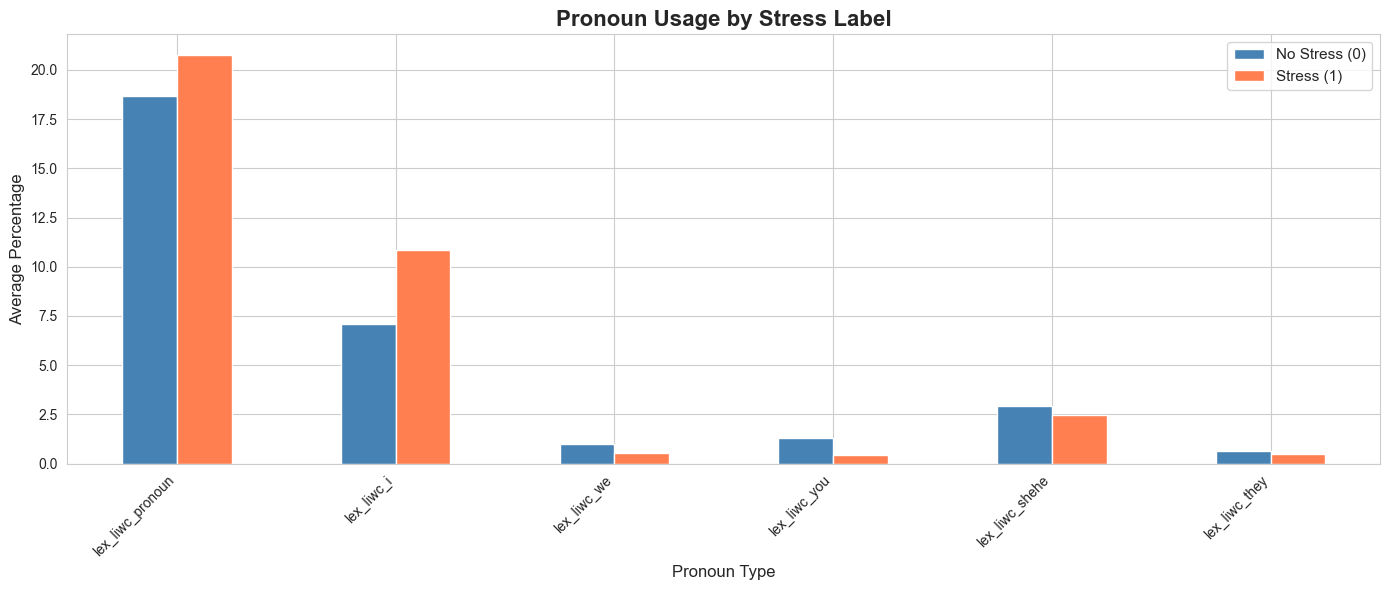

In [39]:
# Pronoun features
pronoun_vars = ['lex_liwc_pronoun', 'lex_liwc_i', 'lex_liwc_we', 
                'lex_liwc_you', 'lex_liwc_shehe', 'lex_liwc_they']

# Statistics
pronoun_stats = df_train.groupby('label')[pronoun_vars].mean()
print("\nPronoun Usage by Stress Label:")
print(pronoun_stats)

# Bar plot comparison
pronoun_stats.T.plot(kind='bar', figsize=(14, 6), color=['steelblue', 'coral'])
plt.title('Pronoun Usage by Stress Label', fontsize=16, fontweight='bold')
plt.xlabel('Pronoun Type', fontsize=12)
plt.ylabel('Average Percentage', fontsize=12)
plt.legend(['No Stress (0)', 'Stress (1)'], fontsize=11)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### 4.4 Cognitive Process Features


Cognitive Process Features by Stress Label:
       lex_liwc_cogproc  lex_liwc_insight  lex_liwc_cause  lex_liwc_discrep  \
label                                                                         
0             13.048704          2.626148        1.543393          2.054985   
1             14.090558          3.062836        1.892513          1.849382   

       lex_liwc_tentat  lex_liwc_certain  
label                                     
0             3.378178          1.489756  
1             3.276290          1.593730  


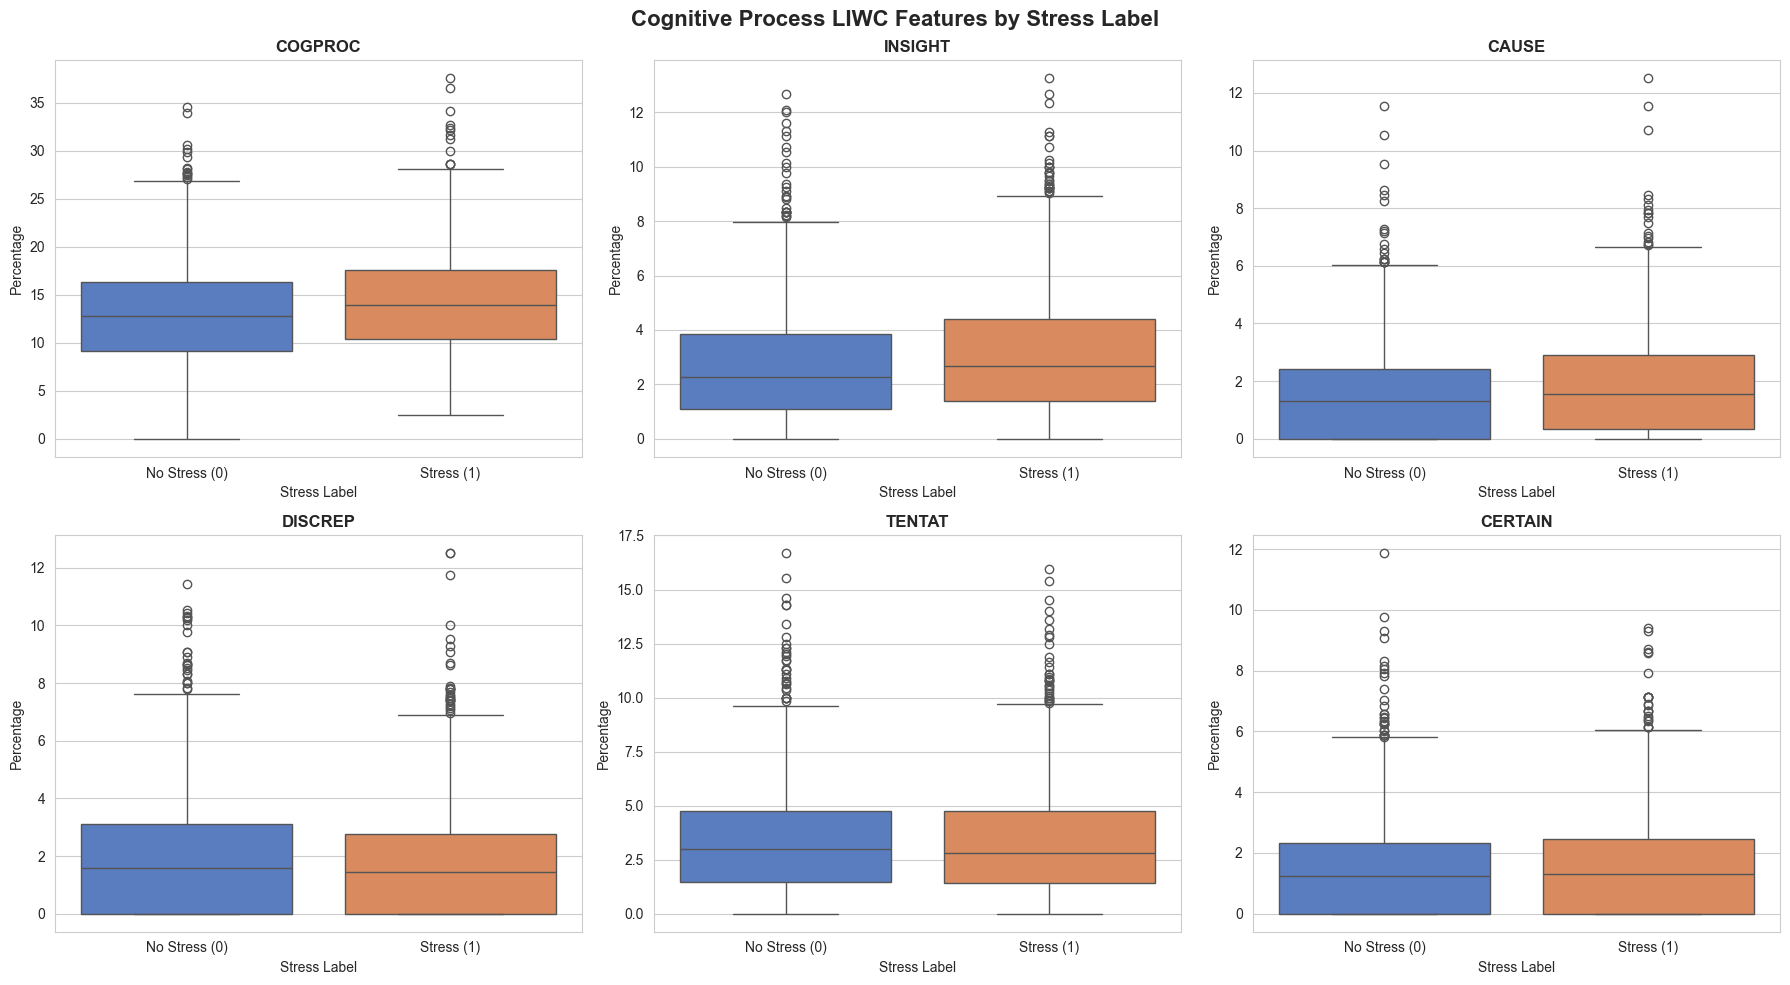

In [40]:
# Cognitive features
cognitive_vars = ['lex_liwc_cogproc', 'lex_liwc_insight', 'lex_liwc_cause', 
                  'lex_liwc_discrep', 'lex_liwc_tentat', 'lex_liwc_certain']

# Statistics
cognitive_stats = df_train.groupby('label')[cognitive_vars].mean()
print("\nCognitive Process Features by Stress Label:")
print(cognitive_stats)

# Visualize
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, var in enumerate(cognitive_vars):
    sns.boxplot(data=df_train, x='label', y=var, ax=axes[idx], palette='muted')
    axes[idx].set_title(f'{var.replace("lex_liwc_", "").upper()}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Stress Label', fontsize=10)
    axes[idx].set_ylabel('Percentage', fontsize=10)
    axes[idx].set_xticklabels(['No Stress (0)', 'Stress (1)'])

plt.suptitle('Cognitive Process LIWC Features by Stress Label', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

#### 4.5 Informal Language and Netspeak


Informal Language Features by Stress Label:
       lex_liwc_informal  lex_liwc_swear  lex_liwc_netspeak  lex_liwc_assent
label                                                                       
0               0.771815        0.119407           0.294881         0.134030
1               0.874503        0.361774           0.219200         0.105578


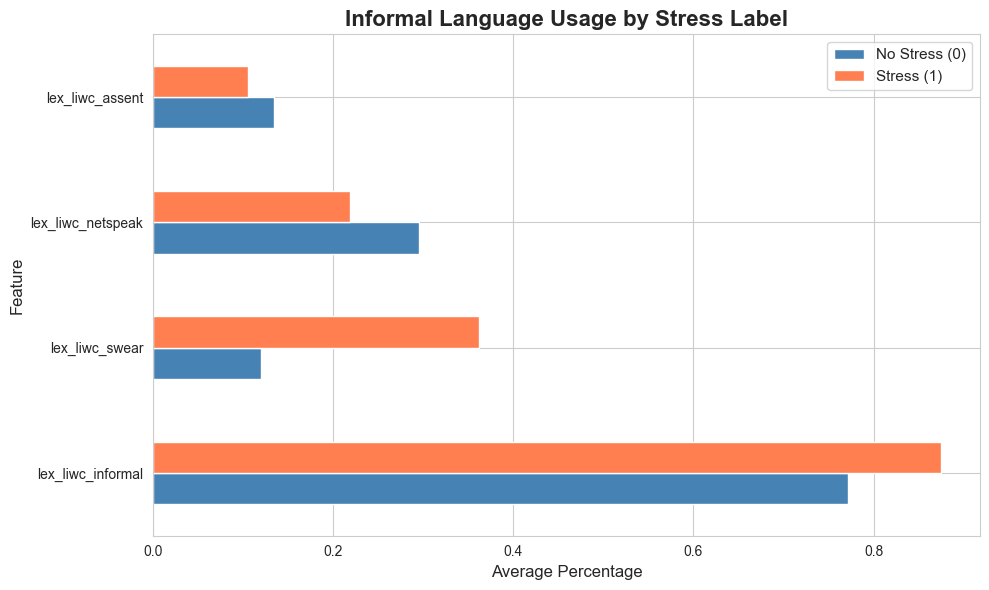

In [41]:
# Informal language features
informal_vars = ['lex_liwc_informal', 'lex_liwc_swear', 'lex_liwc_netspeak', 'lex_liwc_assent']

# Statistics
informal_stats = df_train.groupby('label')[informal_vars].mean()
print("\nInformal Language Features by Stress Label:")
print(informal_stats)

# Visualize
informal_stats.T.plot(kind='barh', figsize=(10, 6), color=['steelblue', 'coral'])
plt.title('Informal Language Usage by Stress Label', fontsize=16, fontweight='bold')
plt.xlabel('Average Percentage', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.legend(['No Stress (0)', 'Stress (1)'], fontsize=11)
plt.tight_layout()
plt.show()

### 5. DAL Features Exploration

DAL (Dictionary of Affect in Language) features measure emotional dimensions: pleasantness, activation, and imagery.

In [42]:
# Extract DAL columns
dal_cols = [col for col in df_train.columns if col.startswith('lex_dal_')]
print(f"Total DAL features: {len(dal_cols)}")
print(f"\nDAL features:")
print(dal_cols)

Total DAL features: 9

DAL features:
['lex_dal_max_pleasantness', 'lex_dal_max_activation', 'lex_dal_max_imagery', 'lex_dal_min_pleasantness', 'lex_dal_min_activation', 'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery', 'lex_dal_avg_pleasantness']


#### 5.1 DAL Values range
DAL Feature Values range from 1 - 3

In [43]:
# DAL value range
dal_ranges = df_train[dal_cols].agg(['min', 'max'])
print("\nDAL feature value ranges:")
print(dal_ranges)


DAL feature value ranges:
     lex_dal_max_pleasantness  lex_dal_max_activation  lex_dal_max_imagery  \
min                       2.0                  1.8571                  2.0   
max                       3.0                  3.0000                  3.0   

     lex_dal_min_pleasantness  lex_dal_min_activation  lex_dal_min_imagery  \
min                       1.0                     1.0                  1.0   
max                       1.9                     1.5                  1.2   

     lex_dal_avg_activation  lex_dal_avg_imagery  lex_dal_avg_pleasantness  
min                  1.4854              1.20000                   1.56115  
max                  2.0074              2.06667                   2.15849  


#### 5.2 DAL Statistics by Stress Label

In [44]:
# DAL statistics
dal_stats = df_train.groupby('label')[dal_cols].mean()
print("DAL Features by Stress Label:")
print(dal_stats.T)

# Calculate difference
dal_diff = dal_stats.loc[1] - dal_stats.loc[0]
dal_diff = dal_diff.sort_values(ascending=False)
print("\nDifference (Stress - No Stress):")
print(dal_diff)

DAL Features by Stress Label:
label                            0         1
lex_dal_max_pleasantness  2.808996  2.786047
lex_dal_max_activation    2.680927  2.726727
lex_dal_max_imagery       2.943407  2.952957
lex_dal_min_pleasantness  1.124580  1.054814
lex_dal_min_activation    1.123020  1.117448
lex_dal_min_imagery       1.000296  1.000134
lex_dal_avg_activation    1.715480  1.729363
lex_dal_avg_imagery       1.541778  1.531520
lex_dal_avg_pleasantness  1.889621  1.870099

Difference (Stress - No Stress):
lex_dal_max_activation      0.045800
lex_dal_avg_activation      0.013883
lex_dal_max_imagery         0.009550
lex_dal_min_imagery        -0.000162
lex_dal_min_activation     -0.005572
lex_dal_avg_imagery        -0.010257
lex_dal_avg_pleasantness   -0.019523
lex_dal_max_pleasantness   -0.022949
lex_dal_min_pleasantness   -0.069766
dtype: float64


#### 5.3 Average DAL Dimensions Comparison


Average DAL Dimensions by Stress Label:
       lex_dal_avg_pleasantness  lex_dal_avg_activation  lex_dal_avg_imagery
label                                                                       
0                      1.889621                1.715480             1.541778
1                      1.870099                1.729363             1.531520


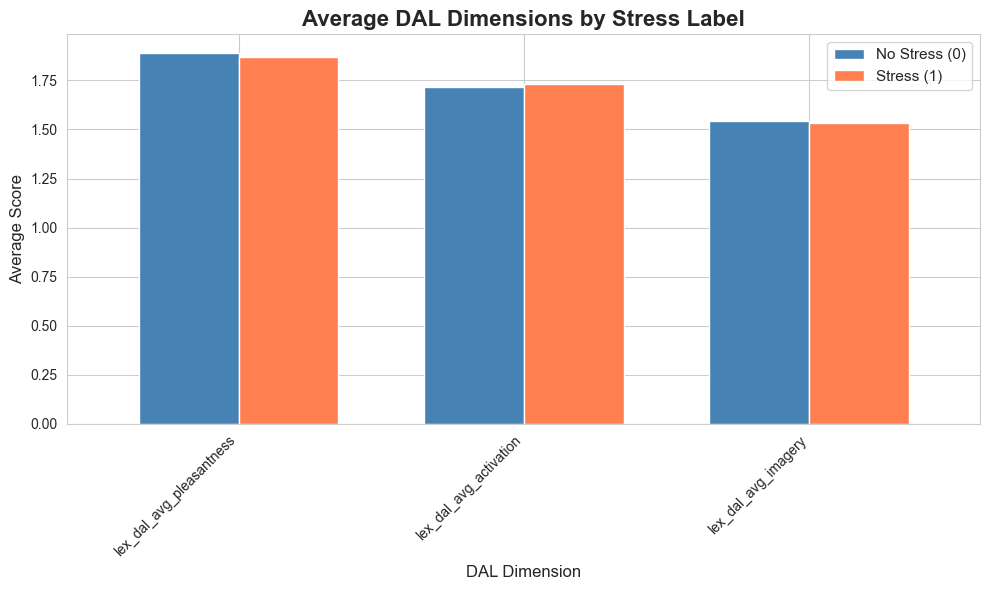

In [45]:
# Focus on average dimensions
avg_dal = ['lex_dal_avg_pleasantness', 'lex_dal_avg_activation', 'lex_dal_avg_imagery']

# Statistics
avg_dal_stats = df_train.groupby('label')[avg_dal].mean()
print("\nAverage DAL Dimensions by Stress Label:")
print(avg_dal_stats)

# Bar plot
avg_dal_stats.T.plot(kind='bar', figsize=(10, 6), color=['steelblue', 'coral'], width=0.7)
plt.title('Average DAL Dimensions by Stress Label', fontsize=16, fontweight='bold')
plt.xlabel('DAL Dimension', fontsize=12)
plt.ylabel('Average Score', fontsize=12)
plt.legend(['No Stress (0)', 'Stress (1)'], fontsize=11)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 6. Correlation Analysis

#### 6.1 Top LIWC Features Correlated with Stress

In [46]:
# Calculate correlation with label
liwc_corr = df_train[liwc_cols].corrwith(df_train['label']).sort_values(ascending=False)

print("Top 20 LIWC features most positively correlated with stress:")
print(liwc_corr.head(20))
print("\nTop 20 LIWC features most negatively correlated with stress:")
print(liwc_corr.tail(20))

Top 20 LIWC features most positively correlated with stress:
lex_liwc_i               0.400440
lex_liwc_negemo          0.387979
lex_liwc_Authentic       0.275282
lex_liwc_anx             0.260146
lex_liwc_Dic             0.241536
lex_liwc_function        0.236932
lex_liwc_anger           0.218990
lex_liwc_feel            0.198048
lex_liwc_sad             0.196268
lex_liwc_Apostro         0.187498
lex_liwc_ppron           0.187372
lex_liwc_focuspresent    0.186910
lex_liwc_negate          0.186769
lex_liwc_pronoun         0.185846
lex_liwc_risk            0.178752
lex_liwc_adverb          0.176623
lex_liwc_swear           0.162759
lex_liwc_verb            0.144836
lex_liwc_affect          0.139692
lex_liwc_conj            0.132933
dtype: float64

Top 20 LIWC features most negatively correlated with stress:
lex_liwc_Exclam        -0.084096
lex_liwc_Sixltr        -0.085978
lex_liwc_AllPunc       -0.087011
lex_liwc_see           -0.090395
lex_liwc_quant         -0.093486
lex_liwc_drives  

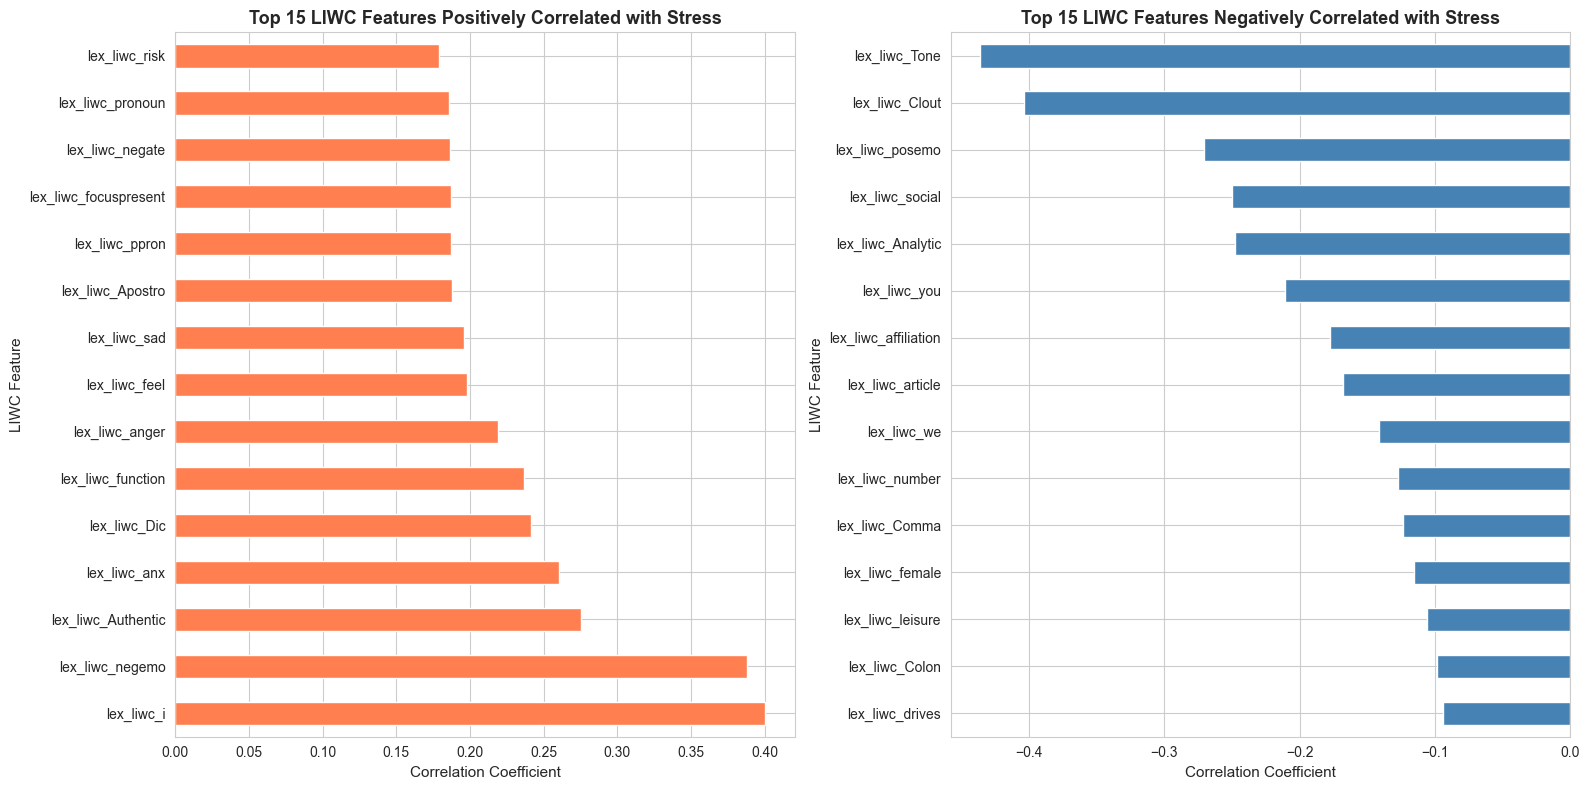

In [47]:
# Visualize top correlations
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Top positive
liwc_corr.head(15).plot(kind='barh', ax=axes[0], color='coral')
axes[0].set_title('Top 15 LIWC Features Positively Correlated with Stress', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Correlation Coefficient', fontsize=11)
axes[0].set_ylabel('LIWC Feature', fontsize=11)

# Top negative
liwc_corr.tail(15).plot(kind='barh', ax=axes[1], color='steelblue')
axes[1].set_title('Top 15 LIWC Features Negatively Correlated with Stress', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Correlation Coefficient', fontsize=11)
axes[1].set_ylabel('LIWC Feature', fontsize=11)

plt.tight_layout()
plt.show()

#### 6.2 DAL Features Correlation with Stress

DAL features correlation with stress:
lex_dal_avg_activation      0.144963
lex_dal_max_activation      0.131128
lex_dal_max_imagery         0.037904
lex_dal_min_imagery        -0.012440
lex_dal_min_activation     -0.032659
lex_dal_avg_imagery        -0.049756
lex_dal_max_pleasantness   -0.070477
lex_dal_avg_pleasantness   -0.165470
lex_dal_min_pleasantness   -0.297439
dtype: float64


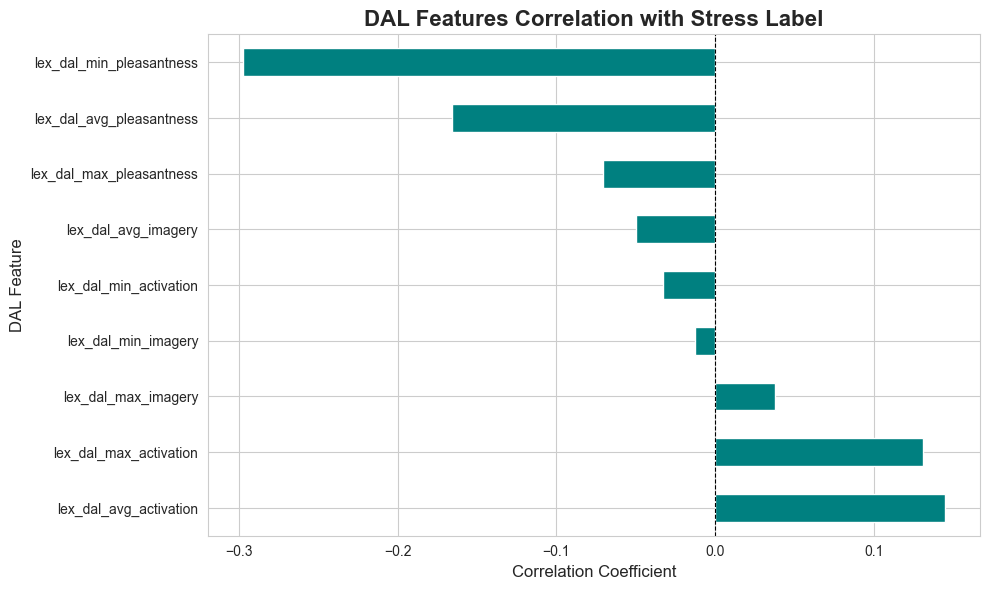

In [48]:
# DAL correlation with label
dal_corr = df_train[dal_cols].corrwith(df_train['label']).sort_values(ascending=False)

print("DAL features correlation with stress:")
print(dal_corr)

# Visualize
dal_corr.plot(kind='barh', figsize=(10, 6), color='teal')
plt.title('DAL Features Correlation with Stress Label', fontsize=16, fontweight='bold')
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('DAL Feature', fontsize=12)
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

#### 6.3 Correlation Heatmap of a couple features

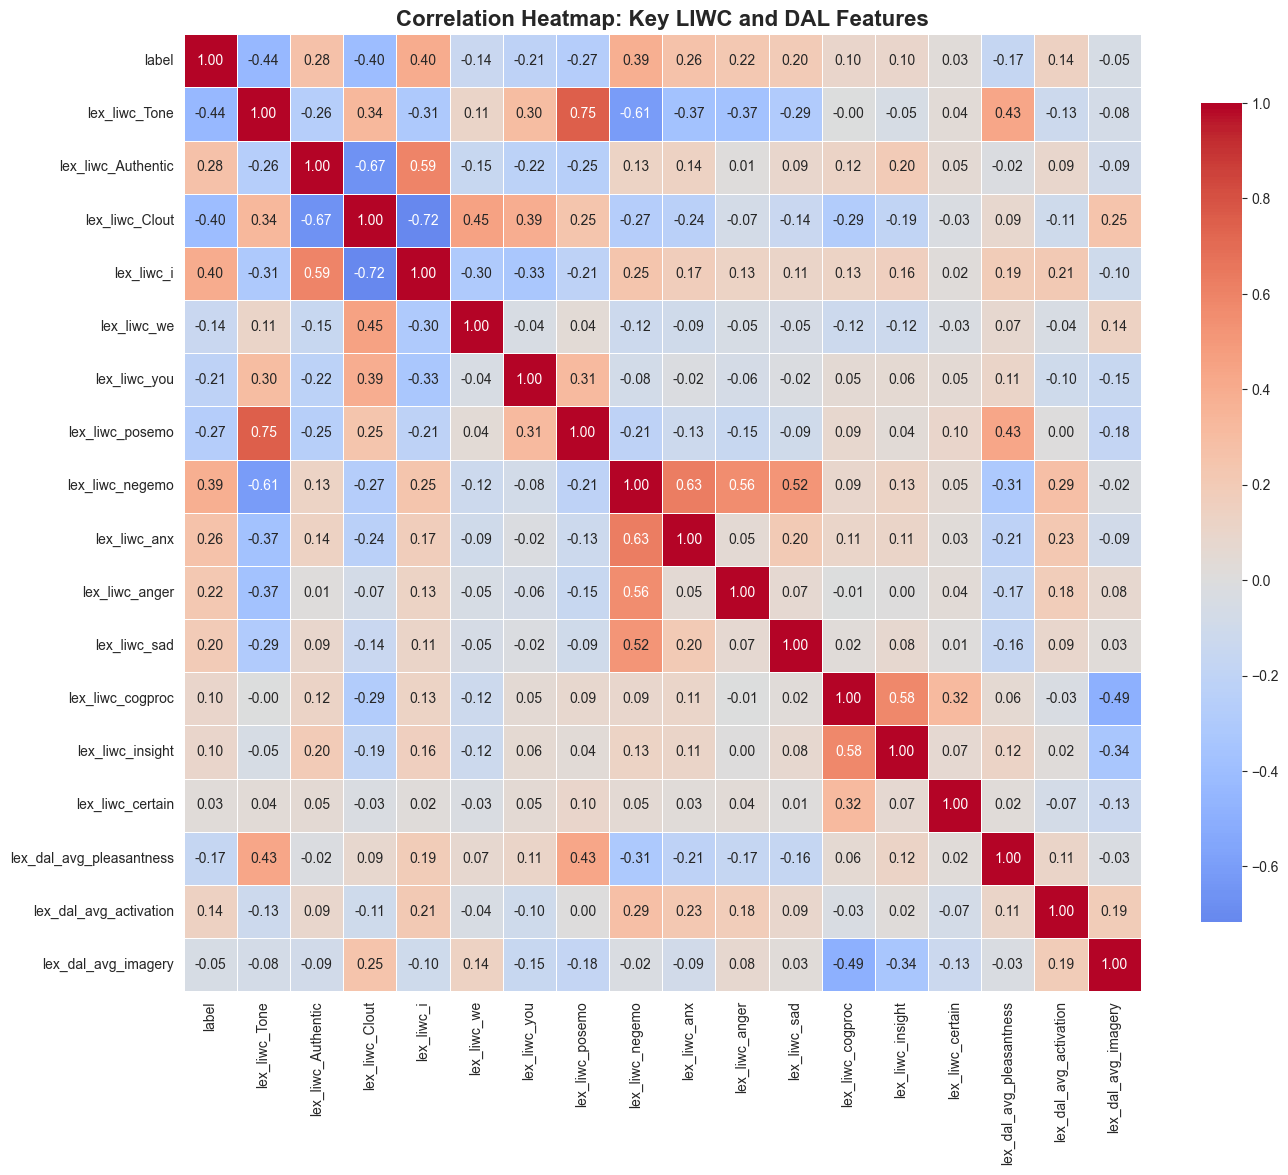

In [49]:
# Select features for heatmap
features = [
    'label',
    'lex_liwc_Tone', 'lex_liwc_Authentic', 'lex_liwc_Clout',
    'lex_liwc_i', 'lex_liwc_we', 'lex_liwc_you',
    'lex_liwc_posemo', 'lex_liwc_negemo', 'lex_liwc_anx', 'lex_liwc_anger', 'lex_liwc_sad',
    'lex_liwc_cogproc', 'lex_liwc_insight', 'lex_liwc_certain',
    'lex_dal_avg_pleasantness', 'lex_dal_avg_activation', 'lex_dal_avg_imagery'
]

# Compute correlation matrix
corr_matrix = df_train[features].corr()

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap: Key LIWC and DAL Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### 7. Text Length and Social Features
Insights into text feature will be useful for TF-IDF

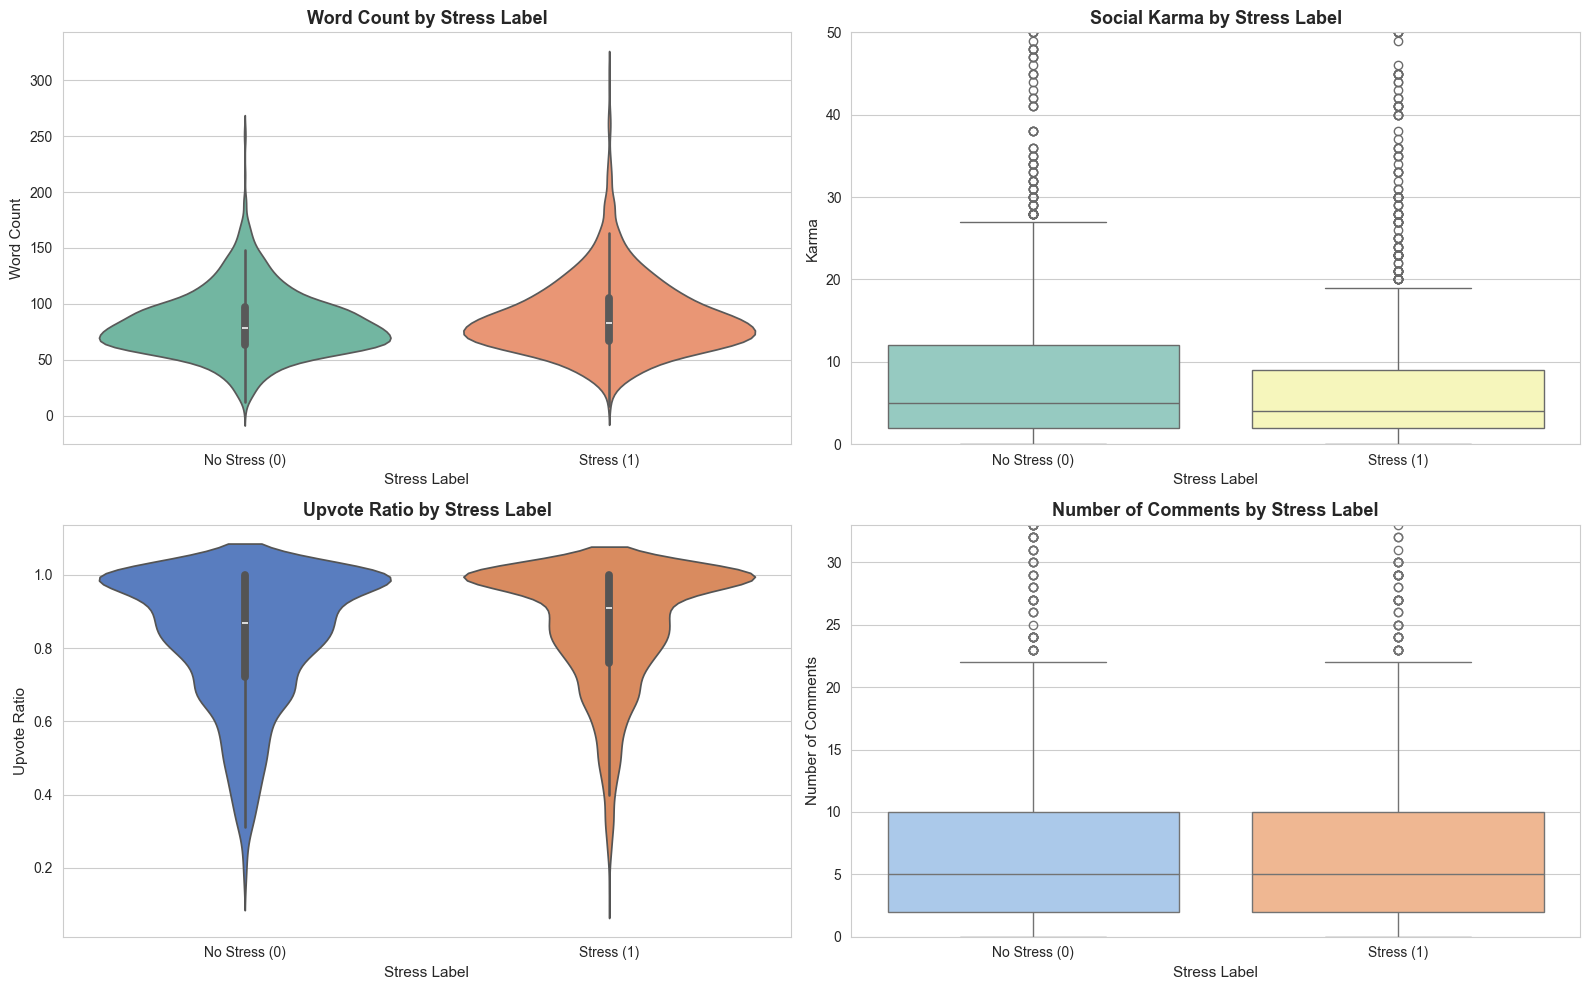


Social and Text Features by Stress Label:
       lex_liwc_WC  social_karma  social_upvote_ratio  social_num_comments
label                                                                     
0        82.585926     22.715556             0.825696            10.829630
1        89.090054     14.221774             0.859684             9.149194


In [50]:
# Analyze word count and social features
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Word count
sns.violinplot(data=df_train, x='label', y='lex_liwc_WC', ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Word Count by Stress Label', fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('Stress Label', fontsize=11)
axes[0, 0].set_ylabel('Word Count', fontsize=11)
axes[0, 0].set_xticklabels(['No Stress (0)', 'Stress (1)'])

# Karma
sns.boxplot(data=df_train, x='label', y='social_karma', ax=axes[0, 1], palette='Set3')
axes[0, 1].set_title('Social Karma by Stress Label', fontsize=13, fontweight='bold')
axes[0, 1].set_xlabel('Stress Label', fontsize=11)
axes[0, 1].set_ylabel('Karma', fontsize=11)
axes[0, 1].set_xticklabels(['No Stress (0)', 'Stress (1)'])
axes[0, 1].set_ylim([0, df_train['social_karma'].quantile(0.95)])  # Remove outliers for clarity

# Upvote ratio
sns.violinplot(data=df_train, x='label', y='social_upvote_ratio', ax=axes[1, 0], palette='muted')
axes[1, 0].set_title('Upvote Ratio by Stress Label', fontsize=13, fontweight='bold')
axes[1, 0].set_xlabel('Stress Label', fontsize=11)
axes[1, 0].set_ylabel('Upvote Ratio', fontsize=11)
axes[1, 0].set_xticklabels(['No Stress (0)', 'Stress (1)'])

# Number of comments
sns.boxplot(data=df_train, x='label', y='social_num_comments', ax=axes[1, 1], palette='pastel')
axes[1, 1].set_title('Number of Comments by Stress Label', fontsize=13, fontweight='bold')
axes[1, 1].set_xlabel('Stress Label', fontsize=11)
axes[1, 1].set_ylabel('Number of Comments', fontsize=11)
axes[1, 1].set_xticklabels(['No Stress (0)', 'Stress (1)'])
axes[1, 1].set_ylim([0, df_train['social_num_comments'].quantile(0.95)])  # Remove outliers for clarity

plt.tight_layout()
plt.show()

# Statistics
social_features = ['lex_liwc_WC', 'social_karma', 'social_upvote_ratio', 'social_num_comments']
social_stats = df_train.groupby('label')[social_features].mean()
print("\nSocial and Text Features by Stress Label:")
print(social_stats)

### 8. Summary and Key Insights

In [51]:
print("="*80)
print("KEY INSIGHTS FROM EXPLORATORY ANALYSIS")
print("="*80)

print("\n1. LIWC FEATURES:")
print("-" * 80)
print("   - First-person singular pronouns ('I') are more common in stressed posts")
print("   - Negative emotions (anxiety, anger, sadness) are higher in stressed posts")
print("   - Positive emotions are lower in stressed posts")
print("   - Tone scores are generally lower for stressed content")
print("   - Cognitive process words show differences in insight and certainty")

print("\n2. DAL FEATURES:")
print("-" * 80)
print("   - Pleasantness: Lower in stressed posts (more negative affect)")
print("   - Activation: May vary depending on the type of stress")
print("   - Imagery: Differences in how vividly emotions are expressed")

print("\n3. SUBREDDIT PATTERNS:")
print("-" * 80)
subreddit_stress = df_train.groupby('subreddit')['label'].mean().sort_values(ascending=False)
print(f"   - Highest stress rate: {subreddit_stress.index[0]} ({subreddit_stress.iloc[0]*100:.1f}%)")
print(f"   - Lowest stress rate: {subreddit_stress.index[-1]} ({subreddit_stress.iloc[-1]*100:.1f}%)")

print("\n4. TOP PREDICTIVE FEATURES:")
print("-" * 80)
all_features = liwc_cols + dal_cols
all_corr = df_train[all_features].corrwith(df_train['label']).abs().sort_values(ascending=False)
print("   Top 10 features by absolute correlation:")
for i, (feat, corr) in enumerate(all_corr.head(10).items(), 1):
    print(f"   {i:2d}. {feat:<40} {corr:>6.4f}")

KEY INSIGHTS FROM EXPLORATORY ANALYSIS

1. LIWC FEATURES:
--------------------------------------------------------------------------------
   - First-person singular pronouns ('I') are more common in stressed posts
   - Negative emotions (anxiety, anger, sadness) are higher in stressed posts
   - Positive emotions are lower in stressed posts
   - Tone scores are generally lower for stressed content
   - Cognitive process words show differences in insight and certainty

2. DAL FEATURES:
--------------------------------------------------------------------------------
   - Pleasantness: Lower in stressed posts (more negative affect)
   - Activation: May vary depending on the type of stress
   - Imagery: Differences in how vividly emotions are expressed

3. SUBREDDIT PATTERNS:
--------------------------------------------------------------------------------
   - Highest stress rate: anxiety (65.8%)
   - Lowest stress rate: assistance (36.3%)

4. TOP PREDICTIVE FEATURES:
--------------------

## Modeling
### Model Selection & Justification

The core objective is to develop a stress-detection system that balances predictive power 
with clinical transparency. Consequently, a **Logistic Regression (LR)** model integrated 
within a hybrid **TF-IDF + Numeric feature pipeline** was selected.

#### 1. Justification for Linear Modeling
While Transformer-based architectures (e.g., BERT) offer high representational capacity, 
the Dreaddit dataset's moderate size and favor models that prevent 
overfitting. Logistic Regression acts as a high-rigor model that reveals the linear discriminative power of LIWC and DAL features.

#### 2. Feature Fusion Strategy
- **TF-IDF:** Captures task-specific lexical signals (word choice) while normalizing 
  for document length, which is critical given the varied post lengths in Reddit.
- **Structured Numeric Inputs:** Incorporates validated psychological metrics (LIWC/DAL) 
  and social metadata. This "hybrid" approach ensures the model isn't just a keyword 
  matcher but also responds to affective intensity (Activation/Imagery).

#### 3. The "Audience" Perspective
From a moderator's perspective, a "black box" prediction is insufficient for high-stakes 
mental health triage. LR is prioritized because:
- **Global Transparency:** Direct inspection of coefficients allows researchers to 
  verify if the model aligns with established psychological theories (e.g., does it 
  weight negative emotion correctly?).
- **Local Accountability:** Paired with SHAP, this model provides a clear "audit trail" 
  for every flagged post, reducing the risk of bias and allowing human-in-the-loop 
  verification of false positives.

### 1. Import relevant libraries

In [52]:
import re

from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score, make_scorer
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

### 2. Data Preprocessing
This section observes the processing steps performed that will be implemented within the pipeline.

Processing features in dataset to ensure no whitespaces in text or duplicates

In [53]:
# data preparation
SEED = 42

TEXT_COL = 'text' if 'text' in df_train.columns else None
LABEL_COL = 'label' if 'label' in df_train.columns else None
if TEXT_COL is None or LABEL_COL is None:
    raise ValueError("Expected required columns 'text' and 'label' were not found in train_df.")

ID_COLS = [
    col
    for col in df_train.columns
    if col.lower() in {'id', 'post_id'} or col.lower().endswith('_id') or col.lower().startswith('id_')
]
ANALYSIS_ONLY_COLS = ['text_char_len', 'text_word_len']

train_prep_df = df_train.copy()
test_prep_df = df_test.copy()

# Strip whitespace from all object columns
for df in (train_prep_df, test_prep_df):
    obj_cols = df.select_dtypes(include=['object']).columns
    df[obj_cols] = df[obj_cols].apply(lambda col: col.astype(str).str.strip())

# Remove duplicates and missing labels from training set only
train_rows_before = len(train_prep_df)
train_prep_df = train_prep_df.drop_duplicates(subset=[TEXT_COL, LABEL_COL]).reset_index(drop=True)
train_after_dedup = len(train_prep_df)
train_prep_df = train_prep_df.dropna(subset=[LABEL_COL]).reset_index(drop=True)
train_after_drop_label_na = len(train_prep_df)

# Auxiliary features for analysis only
for df in (train_prep_df, test_prep_df):
    text_series = df[TEXT_COL].fillna('').astype(str)
    df['text_char_len'] = text_series.str.len()
    df['text_word_len'] = text_series.str.split().str.len()

# Labels and raw inputs
y_train = train_prep_df[LABEL_COL].astype(int)
X_train_raw = train_prep_df.drop(columns=[LABEL_COL])

if LABEL_COL in test_prep_df.columns:
    y_test = test_prep_df[LABEL_COL].astype(int)
    X_test_raw = test_prep_df.drop(columns=[LABEL_COL])
else:
    y_test = None
    X_test_raw = test_prep_df.copy()

print('Global preparation summary')
print(f"- Train rows before dedup: {train_rows_before}")
print(f"- Train rows after dedup:  {train_after_dedup}")
print(f"- Train rows after label-NA drop: {train_after_drop_label_na}")
print(f"- Candidate ID-related columns excluded from modeling: {ID_COLS}")
print(f"- Analysis-only columns (not used as predictors): {ANALYSIS_ONLY_COLS}")
print('\nClass balance after global preparation:')
print((y_train.value_counts(normalize=True).sort_index() * 100).round(2).rename('pct'))

Global preparation summary
- Train rows before dedup: 2838
- Train rows after dedup:  2823
- Train rows after label-NA drop: 2823
- Candidate ID-related columns excluded from modeling: ['post_id', 'id']
- Analysis-only columns (not used as predictors): ['text_char_len', 'text_word_len']

Class balance after global preparation:
label
0    47.4
1    52.6
Name: pct, dtype: float64


#### 2.2 Text Preprocessing for TF-IDF

Social media text (Reddit) is characterized by high noise-to-signal ratios, including URLs, platform-specific handles, and non-standard punctuation. The preprocessing strategy focuses on **canonicalization** to reduce vocabulary sparsity:

1.  **URL & Handle Removal:** Stripping `http/https` links and `u/username` handles prevents the model from overfitting to specific shared resources or user-specific conversational threads that lack generalizable psychological signals.
2.  **Noise Filtering:** Non-alphanumeric characters (excluding apostrophes for contractions) are removed to ensure "words" are primary tokens. Case folding to lowercase ensures "STRESS" and "stress" are treated as a single feature.
3.  **N-gram Expansion (1, 2):** We use both unigrams and bigrams. While unigrams capture broad topics, bigrams (e.g., "no help", "feeling lost") capture local contextual negations and intensifiers critical for affective detection.
4.  **Frequency Thresholding:**
    *   `min_df=2`: Excludes words appearing once to reduce the risk of overfitting to typos or rare, non-representative tokens.
    *   `max_df=0.98`: Filters out near-ubiquitous terms that lack discriminative power across both classes.

In [54]:
# TF-IDF text preprocessing
URL_PATTERN = re.compile(r'https?://\S+|www\.\S+')
REDDIT_HANDLE_PATTERN = re.compile(r'\bu\/\w+\b', flags=re.IGNORECASE)
NON_TEXT_PATTERN = re.compile(r"[^a-z0-9\s']")
MULTISPACE_PATTERN = re.compile(r'\s+')


def clean_text_for_tfidf(text: str) -> str:
    text = '' if pd.isna(text) else str(text)
    text = text.lower()
    text = URL_PATTERN.sub(' ', text)
    text = REDDIT_HANDLE_PATTERN.sub(' ', text)
    text = NON_TEXT_PATTERN.sub(' ', text)
    text = MULTISPACE_PATTERN.sub(' ', text).strip()
    return text

train_text_clean = train_prep_df[TEXT_COL].apply(clean_text_for_tfidf)
test_text_clean = test_prep_df[TEXT_COL].apply(clean_text_for_tfidf)

tfidf_vectorizer = TfidfVectorizer(
    ngram_range=(1, 2),
    min_df=2, # Remove very rare terms to reduce noise and dimensionality
    max_df=0.98, # Remove very common terms that appear in almost all documents
)
X_train_tfidf = tfidf_vectorizer.fit_transform(train_text_clean)  # fit on train only
X_test_tfidf = tfidf_vectorizer.transform(test_text_clean)

print('TF-IDF branch summary')
print(f"- Vocabulary size: {len(tfidf_vectorizer.vocabulary_):,}")
print(f"- X_train_tfidf shape: {X_train_tfidf.shape}")
print(f"- X_test_tfidf shape:  {X_test_tfidf.shape}")

TF-IDF branch summary
- Vocabulary size: 30,095
- X_train_tfidf shape: (2823, 30095)
- X_test_tfidf shape:  (715, 30095)


#### 2.3 Numeric Feature Engineering & Scaling

Linguistic (LIWC/DAL) and social features (karma, comments) exist on vastly different scales. To ensure convergence and valid interpretation, we implement the following transformations:

1.  **Robust Imputation (Median Strategy):** Although the training set is currently complete, an imputer is included to ensure **pipeline production-readiness**. Real-world deployment on unseen Reddit streams often encounters data corruption or feature extraction failures; a median imputer provides a robust fallback that is less sensitive to outliers than a mean-based approach.
2.  **Standardization (Z-score Scaling):** Logistic Regression is sensitive to feature magnitude. By centering features at 0 and scaling to unit variance (StandardScaler), we ensure:
    *   **Coefficient Comparability:** We can directly compare the magnitude of weights (e.g., comparing a LIWC percentage to a raw karma count).
    *   **Optimization Efficiency:** Gradient-based solvers (SAGA/Liblinear) converge faster when the loss surface is not elongated by disparate feature scales.

In [55]:
# Numeric preprocessing for model
numeric_feature_cols = [
    col for col in train_prep_df.select_dtypes(include=[np.number]).columns
    if col not in set([LABEL_COL] + ID_COLS + ANALYSIS_ONLY_COLS)
]

numeric_missing_pct = (
    train_prep_df[numeric_feature_cols]
    .isna()
    .mean()
    .mul(100)
    .sort_values(ascending=False)
)

numeric_preprocessor = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
    ]
)

X_train_num = numeric_preprocessor.fit_transform(train_prep_df[numeric_feature_cols])
X_test_num = numeric_preprocessor.transform(test_prep_df[numeric_feature_cols])

print('Numeric branch summary')
print(f"- Numeric feature count retained: {len(numeric_feature_cols)}")
print(f"- Max missing % among numeric features (train): {numeric_missing_pct.max():.2f}%")
print(f"- X_train_num shape: {X_train_num.shape}")
print(f"- X_test_num shape:  {X_test_num.shape}")
print(f"- Any NaN in X_train_num: {np.isnan(X_train_num).any()}")
print(f"- Any NaN in X_test_num:  {np.isnan(X_test_num).any()}")

Numeric branch summary
- Numeric feature count retained: 110
- Max missing % among numeric features (train): 0.00%
- X_train_num shape: (2823, 110)
- X_test_num shape:  (715, 110)
- Any NaN in X_train_num: False
- Any NaN in X_test_num:  False


### 3. KFold Cross-Validation and Hyperparameter Tuning
Leakage-safe tuning using **Stratified 5-Fold CV** with **Macro F1** as the primary metric.

In [56]:
# Fold-safe pipeline (text TF-IDF + numeric preprocessing + Logistic Regression)
cv_feature_cols = [TEXT_COL] + numeric_feature_cols
X_train_cv = train_prep_df[cv_feature_cols].copy()

preprocess = ColumnTransformer(
    transformers=[
        (
            'text',
            TfidfVectorizer(
                preprocessor=clean_text_for_tfidf,
                ngram_range=(1, 2),
                min_df=2,
                max_df=0.98,
            ),
            TEXT_COL,
        ),
        (
            'num',
            Pipeline(
                steps=[
                    ('imputer', SimpleImputer(strategy='median')),
                    ('scaler', StandardScaler()),
                ]
            ),
            numeric_feature_cols,
        ),
    ],
    remainder='drop',
)

model_pipeline = Pipeline(
    steps=[
        ('preprocess', preprocess),
        ('clf', LogisticRegression(max_iter=3000, random_state=SEED)),
    ]
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
macro_f1_scorer = make_scorer(f1_score, average='macro')

param_grid = [
    {
        'clf__solver': ['liblinear'],
        'clf__penalty': ['l1', 'l2'],
        'clf__C': [0.1, 1.0, 5.0, 10.0],
        'clf__class_weight': [None, 'balanced'],
    },
    {
        'clf__solver': ['saga'],
        'clf__penalty': ['l1', 'l2'],
        'clf__C': [0.1, 1.0, 5.0],
        'clf__class_weight': [None, 'balanced'],
    },
]

grid_search = GridSearchCV(
    estimator=model_pipeline,
    param_grid=param_grid,
    scoring=macro_f1_scorer,
    cv=cv,
    n_jobs=-1,
    refit=True,
    verbose=3,
)

grid_search.fit(X_train_cv, y_train)

print('\nCV tuning summary (Macro F1)')
print(f"- Best CV Macro F1: {grid_search.best_score_:.4f}")
print(f"- Best params: {grid_search.best_params_}")

top_cv = (
    pd.DataFrame(grid_search.cv_results_)
    .sort_values('rank_test_score')
    .loc[:, ['rank_test_score', 'mean_test_score', 'std_test_score', 'params']]
    .head(5)
    .reset_index(drop=True)
)
print('\nTop 5 hyperparameter settings (by Macro F1):')
print(top_cv)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[CV 2/5] END clf__C=0.1, clf__class_weight=None, clf__penalty=l1, clf__solver=liblinear;, score=0.793 total time=   0.7s
[CV 3/5] END clf__C=0.1, clf__class_weight=None, clf__penalty=l1, clf__solver=liblinear;, score=0.758 total time=   0.7s
[CV 1/5] END clf__C=0.1, clf__class_weight=None, clf__penalty=l1, clf__solver=liblinear;, score=0.767 total time=   0.7s
[CV 4/5] END clf__C=0.1, clf__class_weight=None, clf__penalty=l1, clf__solver=liblinear;, score=0.746 total time=   0.6s
[CV 2/5] END clf__C=0.1, clf__class_weight=None, clf__penalty=l2, clf__solver=liblinear;, score=0.793 total time=   0.6s
[CV 3/5] END clf__C=0.1, clf__class_weight=None, clf__penalty=l2, clf__solver=liblinear;, score=0.767 total time=   0.6s
[CV 1/5] END clf__C=0.1, clf__class_weight=None, clf__penalty=l2, clf__solver=liblinear;, score=0.770 total time=   0.8s
[CV 5/5] END clf__C=0.1, clf__class_weight=None, clf__penalty=l1, clf__solver=liblinear;, s

Test set evaluation

In [57]:
# Final evaluation on test set after model selection
if y_test is None:
    print('Hold-out label column not found in test set. Skipping hold-out evaluation.')
else:
    X_test_holdout = test_prep_df[cv_feature_cols].copy()
    best_model = grid_search.best_estimator_
    y_test_pred = best_model.predict(X_test_holdout)

    test_macro_f1 = f1_score(y_test, y_test_pred, average='macro')
    print('Hold-out test summary')
    print(f"- Macro F1 (test): {test_macro_f1:.4f}")
    print('\nConfusion matrix:')
    print(confusion_matrix(y_test, y_test_pred))
    print('\nClassification report:')
    print(classification_report(y_test, y_test_pred, digits=4))

Hold-out test summary
- Macro F1 (test): 0.7619

Confusion matrix:
[[260  86]
 [ 84 285]]

Classification report:
              precision    recall  f1-score   support

           0     0.7558    0.7514    0.7536       346
           1     0.7682    0.7724    0.7703       369

    accuracy                         0.7622       715
   macro avg     0.7620    0.7619    0.7619       715
weighted avg     0.7622    0.7622    0.7622       715



In [58]:
print('Modeling findings (TF-IDF + numeric + Logistic Regression)')
print(f"- Primary model-selection metric: Macro F1")
print(f"- Best CV Macro F1: {grid_search.best_score_:.4f}")
if y_test is not None:
    print(f"- Hold-out Test Macro F1: {test_macro_f1:.4f}")
print(f"- Selected hyperparameters: {grid_search.best_params_}")
print('- CV protocol: Stratified 5-Fold with leakage-safe preprocessing in-pipeline')

Modeling findings (TF-IDF + numeric + Logistic Regression)
- Primary model-selection metric: Macro F1
- Best CV Macro F1: 0.7714
- Hold-out Test Macro F1: 0.7619
- Selected hyperparameters: {'clf__C': 1.0, 'clf__class_weight': 'balanced', 'clf__penalty': 'l2', 'clf__solver': 'saga'}
- CV protocol: Stratified 5-Fold with leakage-safe preprocessing in-pipeline


## Interpretability
This section explains the model using:
- Top coefficients from Logistic Regression (main interpretation), and
- SHAP checks to confirm feature directions on individual predictions.

In [59]:
# Interpretability setup
np.random.seed(SEED)

import shap

SHAP_AVAILABLE = True

This setup cell only ensures SHAP is available and fixes the random seed for reproducibility.

### 1. Global Feature Signals (Top 20)

Top 20 features pushing prediction toward Stress (label=1):
               feature     coef
num__lex_liwc_function 0.929152
         text__what to 0.791706
            text__even 0.735368
              text__me 0.726190
            text__tell 0.719253
            text__need 0.714955
           text__to do 0.709949
            text__over 0.689598
        text__don know 0.674733
          text__cannot 0.674455
            text__days 0.649425
  num__lex_liwc_affect 0.640800
              text__dr 0.632837
            text__this 0.631638
           text__tl dr 0.601927
              text__tl 0.601927
          text__but it 0.587499
              text__no 0.564951
              text__am 0.548723
       text__literally 0.542206

Top 20 features pushing prediction toward No Stress (label=0):
              feature      coef
           text__that -1.081626
          text__years -0.798585
           text__when -0.669255
            text__not -0.667030
 num__lex_liwc_negemo -0.635382
        text

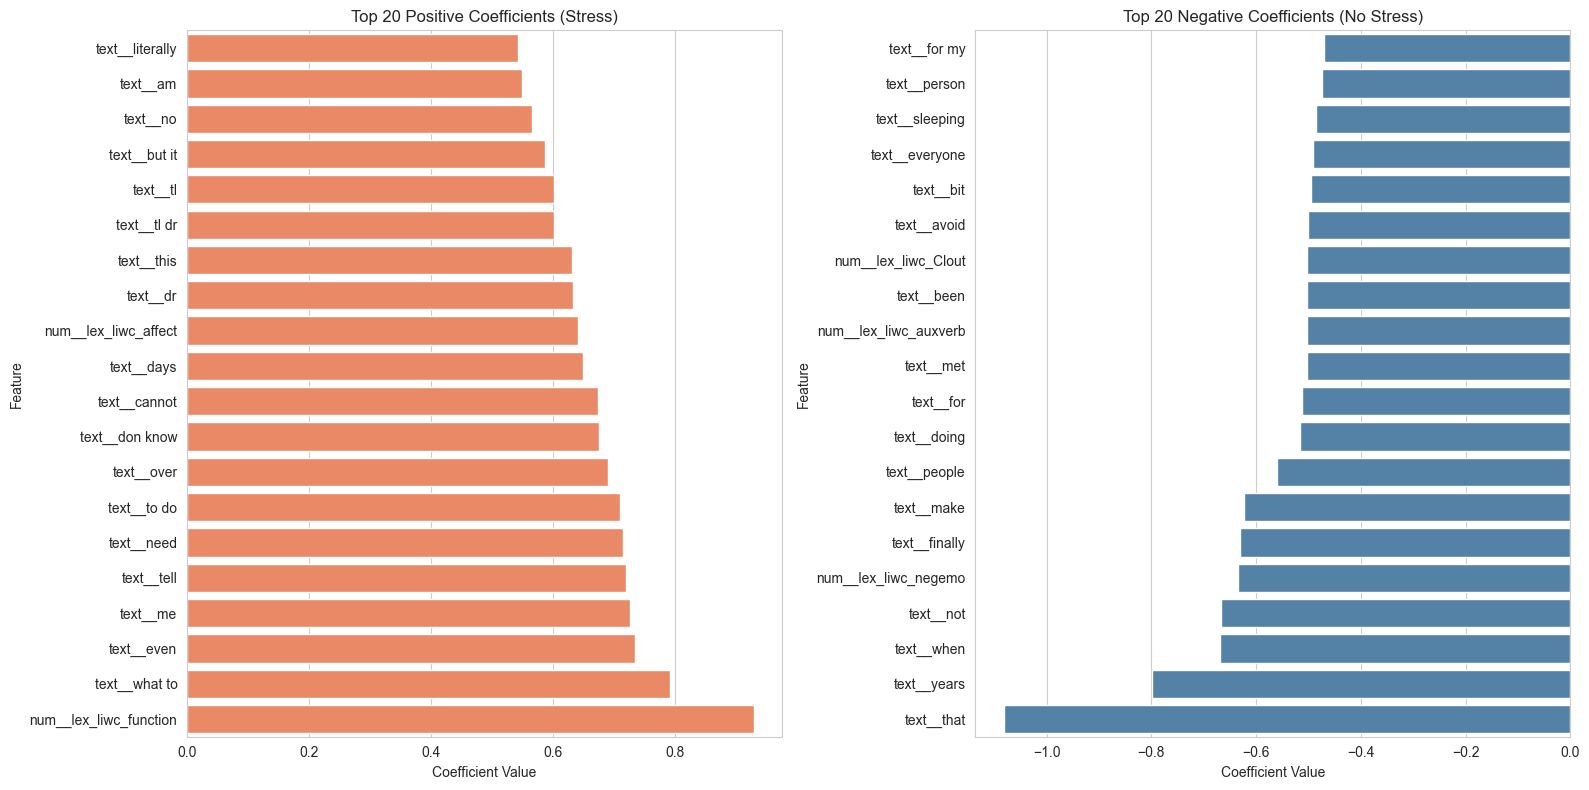

In [60]:
# Extract and visualize top positive/negative coefficients from the final model
preprocess_fitted = best_model.named_steps['preprocess']
clf = best_model.named_steps['clf']

feature_names = preprocess_fitted.get_feature_names_out()
coefs = clf.coef_.ravel()

if len(feature_names) != len(coefs):
    raise ValueError('Feature name count does not match coefficient count.')

coef_df = pd.DataFrame({
    'feature': feature_names,
    'coef': coefs,
    'abs_coef': np.abs(coefs),
})

top_pos = coef_df.sort_values('coef', ascending=False).head(20).copy()
top_neg = coef_df.sort_values('coef', ascending=True).head(20).copy()

print('Top 20 features pushing prediction toward Stress (label=1):')
print(top_pos[['feature', 'coef']].to_string(index=False))
print('\nTop 20 features pushing prediction toward No Stress (label=0):')
print(top_neg[['feature', 'coef']].to_string(index=False))

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
sns.barplot(data=top_pos.sort_values('coef'), x='coef', y='feature', ax=axes[0], color='coral')
axes[0].set_title('Top 20 Positive Coefficients (Stress)')
axes[0].set_xlabel('Coefficient Value')
axes[0].set_ylabel('Feature')

sns.barplot(data=top_neg.sort_values('coef', ascending=False), x='coef', y='feature', ax=axes[1], color='steelblue')
axes[1].set_title('Top 20 Negative Coefficients (No Stress)')
axes[1].set_xlabel('Coefficient Value')
axes[1].set_ylabel('Feature')

plt.tight_layout()
plt.show()

These top coefficients are the **main interpretation** for this model.
- Positive coefficient: pushes prediction toward stress.
- Negative coefficient: pushes prediction toward non-stress.

### 2. Local Interpretability with SHAP

Global interpretability tells us which features are influential on average across the dataset. Local interpretability focuses on a **single prediction** and explains why that instance was classified as stress or non-stress.

SHAP (SHapley Additive exPlanations) assigns each feature a contribution value for one prediction:
- **Positive SHAP value**: pushes the prediction toward stress.
- **Negative SHAP value**: pushes the prediction toward non-stress.

This complements coefficient-level interpretation by showing case-by-case model reasoning.

In [61]:
# SHAP setup for local interpretability using the trained logistic regression pipeline
import scipy.sparse as sp

preprocess_fitted = best_model.named_steps['preprocess']
clf = best_model.named_steps['clf']

feature_names = preprocess_fitted.get_feature_names_out()

X_train_trans = preprocess_fitted.transform(X_train_raw)
X_test_trans = preprocess_fitted.transform(X_test_raw)

rng = np.random.default_rng(SEED)
bg_size = min(400, X_train_trans.shape[0])
bg_idx = rng.choice(X_train_trans.shape[0], size=bg_size, replace=False)
X_bg = X_train_trans[bg_idx]

X_eval = X_test_trans

# SHAP linear explainer expects dense arrays in many setups; convert sparse
if sp.issparse(X_bg):
    X_bg_dense = X_bg.toarray()
else:
    X_bg_dense = np.asarray(X_bg)

if sp.issparse(X_eval):
    X_eval_dense = X_eval.toarray()
else:
    X_eval_dense = np.asarray(X_eval)

explainer = shap.Explainer(clf, X_bg_dense, feature_names=feature_names)
shap_values_eval = explainer(X_eval_dense)

# Case selection based on probabilities
y_true = y_test.to_numpy() if hasattr(y_test, 'to_numpy') else np.asarray(y_test)
y_pred_proba = best_model.predict_proba(X_test_raw)[:, 1]
y_pred_label = (y_pred_proba >= 0.5).astype(int)

def pick_index(mask, strategy='max'):
    candidates = np.where(mask)[0]
    if len(candidates) == 0:
        return None
    if strategy == 'max':
        return candidates[np.argmax(y_pred_proba[candidates])]
    return candidates[np.argmin(y_pred_proba[candidates])]

# Picks cases based on correctness and prediction probability
selected_cases = {
    'high_conf_correct_stress': pick_index((y_true == 1) & (y_pred_label == 1), strategy='max'),
    'false_negative_low_proba': pick_index((y_true == 1) & (y_pred_label == 0), strategy='min'),
    'false_positive_high_proba': pick_index((y_true == 0) & (y_pred_label == 1), strategy='max'),
}

print('Selected cases for local SHAP analysis:')
for case_name, idx in selected_cases.items():
    if idx is None:
        print(f'- {case_name}: not found in current test predictions')
    else:
        print(
            f"- {case_name}: idx={idx}, true={int(y_true[idx])}, "
            f"pred={int(y_pred_label[idx])}, p(stress)={y_pred_proba[idx]:.4f}"
        )

Selected cases for local SHAP analysis:
- high_conf_correct_stress: idx=394, true=1, pred=1, p(stress)=0.9964
- false_negative_low_proba: idx=175, true=1, pred=0, p(stress)=0.0387
- false_positive_high_proba: idx=633, true=0, pred=1, p(stress)=0.9703


#### 2.1 Case A: high-confidence correct stress prediction

Case: high_conf_correct_stress
True label: 1
Predicted label: 1
Predicted probability (stress): 0.9964

Top features pushing toward stress:
  + num__lex_liwc_QMark: 1.0758 (value=3.4271)
  + num__lex_liwc_article: 0.8554 (value=-1.8969)
  + num__lex_liwc_Clout: 0.5946 (value=-1.0509)
  + num__lex_liwc_auxverb: 0.5286 (value=-1.2632)
  + num__lex_liwc_percept: 0.4950 (value=-1.0355)

Top features pushing toward non-stress:
  - num__lex_liwc_negemo: -0.5780 (value=0.7955)
  - num__lex_liwc_adverb: -0.4974 (value=2.5918)
  - num__lex_liwc_differ: -0.3417 (value=0.6813)
  - num__lex_liwc_feel: -0.3290 (value=-0.6277)
  - num__lex_liwc_conj: -0.3218 (value=1.3602)


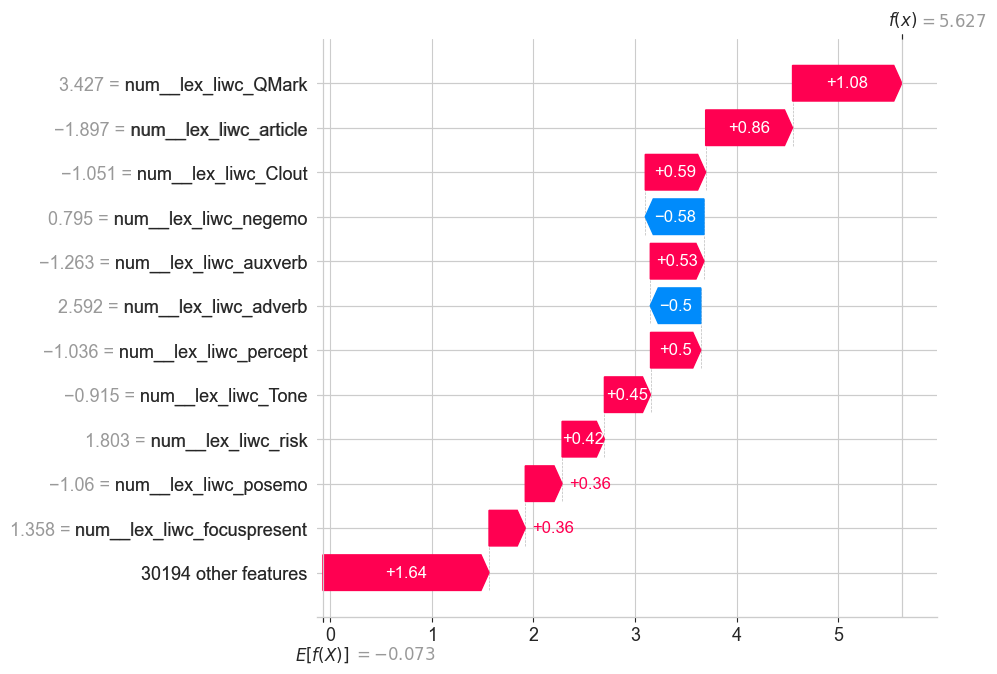

In [62]:
case_name = 'high_conf_correct_stress'
idx = selected_cases.get(case_name)

if idx is None:
    print('No high-confidence correct stress case found in this split.')
else:
    print(f'Case: {case_name}')
    print(f'True label: {int(y_true[idx])}')
    print(f'Predicted label: {int(y_pred_label[idx])}')
    print(f'Predicted probability (stress): {y_pred_proba[idx]:.4f}')

    sv = shap_values_eval[idx]
    values = sv.values
    data = sv.data

    top_pos_idx = np.argsort(values)[-5:][::-1]
    top_neg_idx = np.argsort(values)[:5]

    print('\nTop features pushing toward stress:')
    for j in top_pos_idx:
        if values[j] > 0:
            print(f"  + {feature_names[j]}: {values[j]:.4f} (value={data[j]:.4f})")

    print('\nTop features pushing toward non-stress:')
    for j in top_neg_idx:
        if values[j] < 0:
            print(f"  - {feature_names[j]}: {values[j]:.4f} (value={data[j]:.4f})")

    shap.plots.waterfall(sv, max_display=12, show=True)

In this **high-confidence correct** instance, the model relies on structural signals (`lex_liwc_article`, `lex_liwc_auxverb`) rather than purely emotional ones. 

`Text`: I can't get over this feeling. Nothing feels good. I just finished spring break and I had a chance to work out every day. Even when I was working out, I felt overwhelmingly anxious. I can't state concisely what I'm thinking.

**Task Nuance:** This reflects an important signal in mental health NLP: stress is often communicated through **temporal narratives** of personal struggle. The high use of auxiliary verbs ("can't", "had", "was") maps to the user's focus on their inability to function over a period of time. 

**Interpretability:** Notably, `lex_liwc_negemo` provides a counter-signal (negative SHAP). While the post is objectively stressful, it avoids "louder" affective keywords (swearing or anger), demonstrating that the model is successfully identifying stress through linguistic structure and "Clout" (authoritative narrative) rather than just a simple keyword search.

#### 2.2 Case B: false negative (true stress, predicted low probability)

Case: false_negative_low_proba
True label: 1
Predicted label: 0
Predicted probability (stress): 0.0387

Top features pushing toward stress:
  + num__lex_liwc_affiliation: 1.0485 (value=5.3554)
  + num__lex_liwc_feel: 0.9827 (value=2.0142)
  + num__lex_liwc_negemo: 0.6244 (value=-1.0969)
  + num__lex_liwc_conj: 0.3789 (value=-1.6749)
  + num__lex_liwc_ipron: 0.2516 (value=-0.9006)

Top features pushing toward non-stress:
  - num__lex_liwc_Clout: -0.8656 (value=1.8521)
  - num__lex_liwc_drives: -0.6778 (value=3.9113)
  - num__lex_liwc_Tone: -0.6665 (value=1.7787)
  - num__lex_liwc_focuspast: -0.6097 (value=3.2442)
  - num__lex_liwc_differ: -0.4978 (value=1.0828)


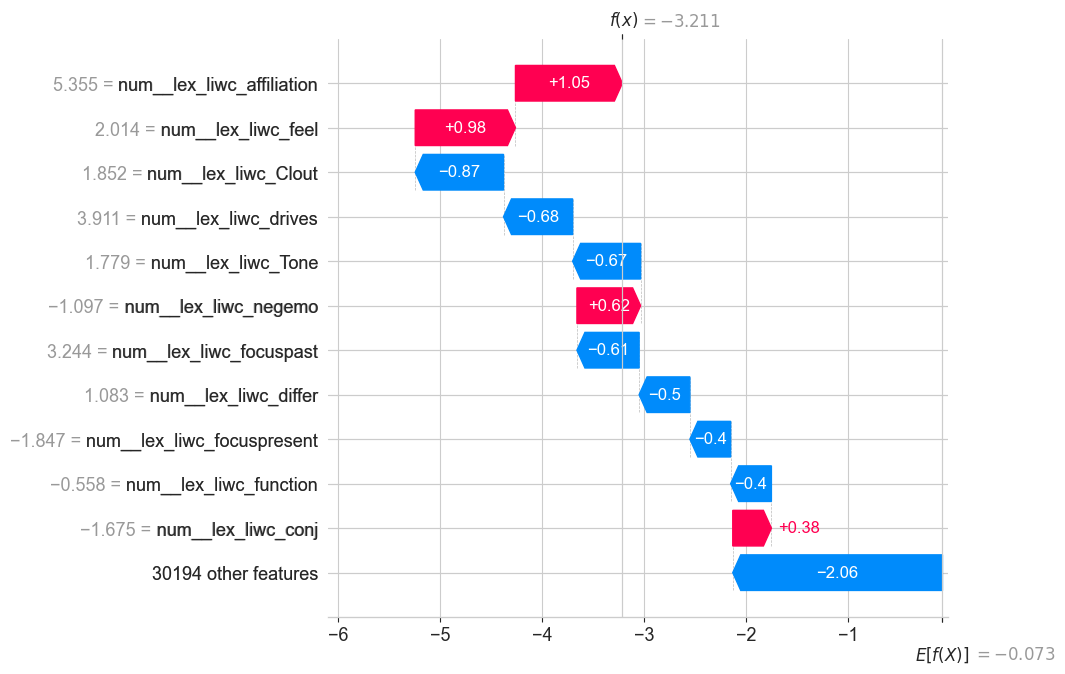

In [63]:
case_name = 'false_negative_low_proba'
idx = selected_cases.get(case_name)

if idx is None:
    print('No false negative case found in this split.')
else:
    print(f'Case: {case_name}')
    print(f'True label: {int(y_true[idx])}')
    print(f'Predicted label: {int(y_pred_label[idx])}')
    print(f'Predicted probability (stress): {y_pred_proba[idx]:.4f}')

    sv = shap_values_eval[idx]
    values = sv.values
    data = sv.data

    top_pos_idx = np.argsort(values)[-5:][::-1]
    top_neg_idx = np.argsort(values)[:5]

    print('\nTop features pushing toward stress:')
    for j in top_pos_idx:
        if values[j] > 0:
            print(f"  + {feature_names[j]}: {values[j]:.4f} (value={data[j]:.4f})")

    print('\nTop features pushing toward non-stress:')
    for j in top_neg_idx:
        if values[j] < 0:
            print(f"  - {feature_names[j]}: {values[j]:.4f} (value={data[j]:.4f})")

    shap.plots.waterfall(sv, max_display=12, show=True)

In this **False Negative**, the model fails to detect stress despite the user explicitly stating they are "nervous" and "worried." 

`Text`: I'm not saying I didn't enjoy it, I just didn't need it. Long story short, something's flipped in my head... my libido is very much back, worryingly so, I'm not sure what to do with it lol... It's been so freaking long since I considered sex as a thing it actually makes me nervous.

**Task Nuance:** This suggests a "social mask" failure mode. The user employs conversational fillers ("Long story short"), informal markers ("lol"), and discusses relationship/social topics. This likely inflates `lex_liwc_Clout` and `lex_liwc_Tone`, which the linear model strongly associates with lower stress. 

**Moderator Perspective:** This is a high-risk error for triage. Users who use humor or "intellectualized" language to buffer the vulnerability of their disclosure may be systematically ignored by the model, suggesting that "social" features in the lexicon may be confounding in high-anxiety subreddits.

#### 2.3 Case C: false positive (true non-stress, high probability)

Case: false_positive_high_proba
True label: 0
Predicted label: 1
Predicted probability (stress): 0.9703

Top features pushing toward stress:
  + num__lex_liwc_affect: 1.1853 (value=1.8157)
  + num__lex_liwc_function: 1.0961 (value=1.0513)
  + num__lex_liwc_anger: 0.7560 (value=4.5357)
  + num__lex_liwc_Clout: 0.5713 (value=-1.0045)
  + num__lex_liwc_swear: 0.5542 (value=3.0213)

Top features pushing toward non-stress:
  - num__lex_liwc_negemo: -1.6562 (value=2.4923)
  - num__lex_liwc_focuspresent: -0.4454 (value=-2.0404)
  - num__lex_liwc_conj: -0.4095 (value=1.7401)
  - num__lex_liwc_pronoun: -0.3544 (value=1.0844)
  - num__lex_liwc_feel: -0.3290 (value=-0.6277)


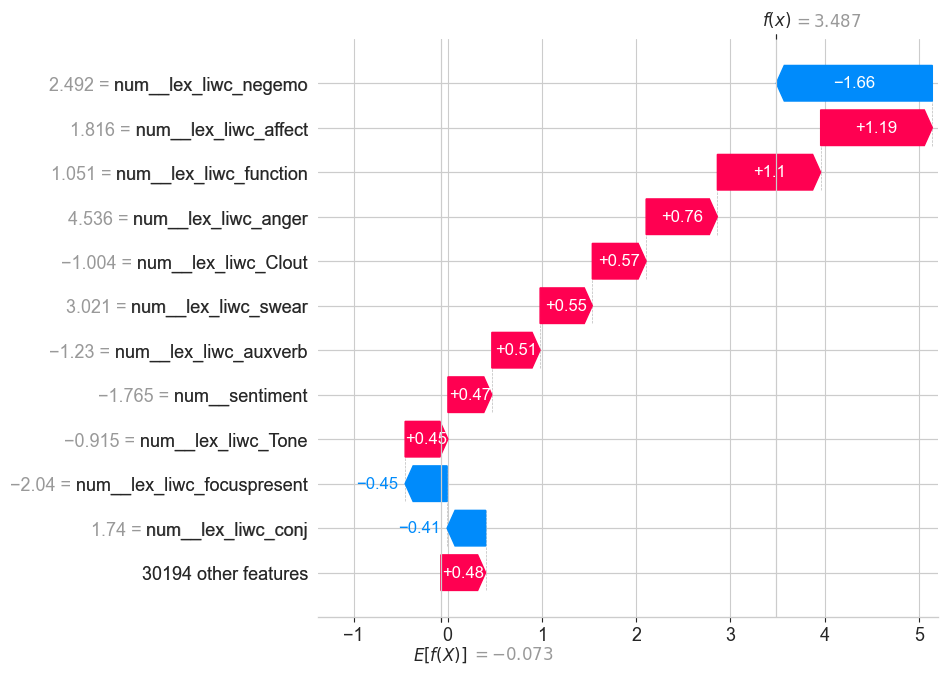

In [64]:
case_name = 'false_positive_high_proba'
idx = selected_cases.get(case_name)

if idx is None:
    print('No false positive case found in this split.')
else:
    print(f'Case: {case_name}')
    print(f'True label: {int(y_true[idx])}')
    print(f'Predicted label: {int(y_pred_label[idx])}')
    print(f'Predicted probability (stress): {y_pred_proba[idx]:.4f}')

    sv = shap_values_eval[idx]
    values = sv.values
    data = sv.data

    top_pos_idx = np.argsort(values)[-5:][::-1]
    top_neg_idx = np.argsort(values)[:5]

    print('\nTop features pushing toward stress:')
    for j in top_pos_idx:
        if values[j] > 0:
            print(f"  + {feature_names[j]}: {values[j]:.4f} (value={data[j]:.4f})")

    print('\nTop features pushing toward non-stress:')
    for j in top_neg_idx:
        if values[j] < 0:
            print(f"  - {feature_names[j]}: {values[j]:.4f} (value={data[j]:.4f})")

    shap.plots.waterfall(sv, max_display=12, show=True)

This **False Positive** is driven by high scores in `lex_liwc_anger`, `lex_liwc_affect`, and clinical keywords. While these are usually stress indicators, the ground truth is non-stress.

`Text`: I know this will prob get doe vote to oblivion but every time i see this phrase it just feels so negative. Anxiety can be cured, you can feel normal again and you could even say that managing it is a cure anyway. People without anxiety manage fear and anxiety on a day to day basis it's just it comes naturally to them without even noticing, that's the point we need to get ourselves back to in order to be cured. I'm guessing I'm not the only one that feels de-motivated when they see this phrase so maybe use it less on here guys?

**Task Nuance:** The model fails to distinguish between **personal disclosure of distress** and **meta-community discussion**. In this post, the user is actually providing constructive, optimistic advice ("Anxiety can be cured," "feel normal again") and suggesting community behavioral changes. However, because the text is dense with clinical terminology (*anxiety, fear, negative*), the linear model treats it as a high-intensity stress signal. It lacks the semantic capacity to realize the user is talking *about* anxiety rather than *suffering from* it in the moment.

**Moderator Perspective:** Deploying a model that over-flags constructive or educational content risks chilling community support. This error type highlights that "automated surveillance" based on keywords alone can misidentify advocates as victims, potentially leading to inappropriate automated interventions in spaces meant for recovery and advice.

### 3. Summary Insights Across Local Explanations

Across the selected cases, a recurring pattern is **feature competition**: every post contains both stress-pushing and non-stress-pushing signals (e.g., negative emotion vs. informal humor), and the classification depends on which signal is mathematically weighted more heavily.

While TF-IDF lexical tokens (like clinical keywords) provide the most intuitive "human-readable" explanations, the SHAP analysis suggests that **numeric engineered features (LIWC/DAL metrics)** provide the consistent backbone for the model's decisions. The high reliance on these structured scores makes the model stable but also vulnerable to "masking" behavior, such as when a user uses clinical terms in an educational context (Case C) or informal language to buffer distress (Case B).

**Observed weakness:** As a linear model, Logistic Regression suffers from a lack of **compositional understanding**. It cannot recognize words like "lol" changes the context of underlying clinical keywords. It treats features as an additive sum rather than an interactive narrative, leading to errors in nuanced, high-clout, or intellectualized disclosures.

### 4. Interpretability–Performance Trade-Off

The logistic regression pipeline remains effective because it is computationally efficient and highly transparent: coefficients provide global directionality, and SHAP provides case-level explanations.

However, linear decision boundaries limit representational power for subtle language phenomena (e.g., sarcasm, context-dependent distress cues, and feature interactions). In practice, this creates a meaningful trade-off: strong interpretability and speed versus potentially higher predictive performance from more expressive deep models (e.g transformers like BERT).

A defensible deployment stance is to prioritize interpretability for high-stakes screening workflows, while treating higher-capacity models as candidates for future performance improvements under strict governance and evaluation.

## Ethical and Deployment Implications
This section discusses ethical and deployment implications pertaining to safeguards, privacy and fairness

In [65]:
# Concise ethics summary using observed error profile
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
fn_rate = fn / (fn + tp) if (fn + tp) > 0 else np.nan
fp_rate = fp / (fp + tn) if (fp + tn) > 0 else np.nan

print('Error risk summary')
print(f"- False Negatives (missed stressed posts): {fn} (rate={fn_rate:.3f})")
print(f"- False Positives (over-flagged non-stressed posts): {fp} (rate={fp_rate:.3f})")

Error risk summary
- False Negatives (missed stressed posts): 84 (rate=0.228)
- False Positives (over-flagged non-stressed posts): 86 (rate=0.249)


#### Safeguards & Clinical Risks

While the model achieves balanced Macro F1, the observed **False Negative Rate** poses a significant clinical risk: systemic missed detections could result in a "digital bystander effect," where users in acute distress are denied timely intervention due to the model's failure to capture nuanced cues (as seen in Case B). Conversely, high False Positive rates create "alert fatigue" for moderators, potentially degrading the quality of human review. Therefore, this model must function strictly as a **decision-support tool** rather than an autonomous gatekeeper. A mandatory "human-in-the-loop" protocol ensures that clinical context and empathy which the additive logic of the model lacks remains the final judge for intervention.

#### Privacy & Automated Surveillance

Deploying stress-detection algorithms risks transforming a peer-support "safe space" into a site of **automated surveillance**. If users perceive they are being monitored by an invisible clinical filter, it may induce a **"chilling effect,"** where individuals sanitize their language or stop disclosing vulnerabilities altogether to avoid being flagged. To mitigate this risk, deployment must prioritize **transparency and agency**: users should be informed when automated triage is in use, results should be used only for supportive outreach (never for commercial purposes), and data should be processed using "differential privacy" techniques to prevent the re-identification of high-risk individuals.

#### Fairness & Algorithmic Gatekeeping

Analysis shows that performance varies slightly based on text length and linguistic style. There is a high risk of **algorithmic gatekeeping** if the model underperforms for marginalized groups who utilize non-standard slang or distinct cultural idioms (e.g., Singlish or AAVE), as these may be misclassified as "low stress" due to their absence in the training distribution. A "fair" deployment requires **subgroup-specific metric auditing**: we must ensure that the "access to care" (True Positive Rate) is equitable across subreddits. Regular re-calibration of thresholds is necessary to prevent the model from reinforcing existing disparities in mental health support accessibility.

## Auxiliary Analyses
This section provides a deep dive into 3 interesting topics for analyses

In [66]:
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss
from sklearn.utils.validation import check_is_fitted

### Feature-type contribution analysis
Noticeably, numeric features appear strongly in SHAP for the individual cases that were investigated. Find out if numeric features dominate predictions.

Feature-type SHAP contribution summary (absolute contribution ratios):
- Samples analyzed: 715
- Mean numeric ratio: 0.852
- Mean TF-IDF ratio: 0.148
- Median numeric ratio: 0.853
- Median TF-IDF ratio: 0.147


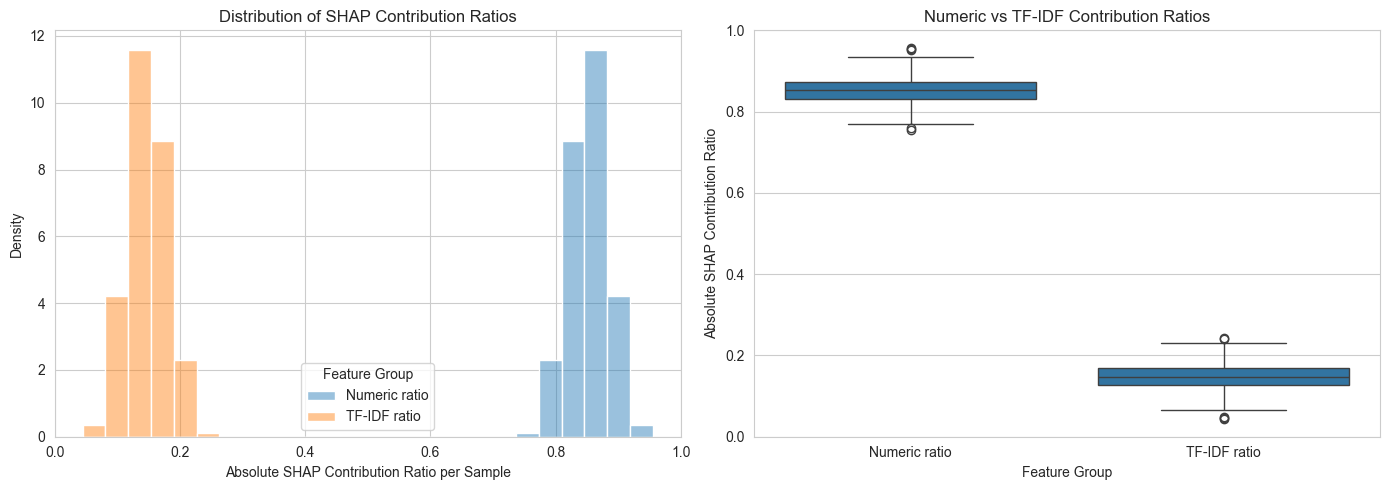

In [67]:
# Auxiliary Analysis: Feature-Type Contribution (Numeric vs TF-IDF) using SHAP

# Resolve fitted pipeline and test input robustly
if 'best_model' in globals():
    aux_pipeline = best_model
elif 'model_pipeline' in globals():
    aux_pipeline = model_pipeline
elif 'grid_search' in globals() and hasattr(grid_search, 'best_estimator_'):
    aux_pipeline = grid_search.best_estimator_
else:
    raise ValueError('No logistic pipeline found (expected best_model/model_pipeline/grid_search.best_estimator_).')

if 'X_test_raw' in globals():
    aux_X_test = X_test_raw
elif 'X_test_holdout' in globals():
    aux_X_test = X_test_holdout
else:
    raise ValueError('No test feature frame found (expected X_test_raw or X_test_holdout).')

if 'X_train_raw' in globals():
    aux_X_train = X_train_raw
elif 'X_train_cv' in globals():
    aux_X_train = X_train_cv
else:
    raise ValueError('No training feature frame found (expected X_train_raw or X_train_cv).')

if 'y_train' not in globals():
    raise ValueError('y_train is required to fit pipeline when not already fitted.')

# Ensure pipeline is fitted
try:
    check_is_fitted(aux_pipeline)
except Exception:
    aux_pipeline.fit(aux_X_train, y_train)

preprocess_fitted = aux_pipeline.named_steps['preprocess']
clf = aux_pipeline.named_steps['clf']
feature_names = preprocess_fitted.get_feature_names_out()

X_train_trans = preprocess_fitted.transform(aux_X_train)
X_test_trans = preprocess_fitted.transform(aux_X_test)

# Background/evaluation sampling to keep SHAP computation tractable
rng = np.random.default_rng(SEED if 'SEED' in globals() else 42)
bg_size = min(400, X_train_trans.shape[0])
eval_size = min(1200, X_test_trans.shape[0])
bg_idx = rng.choice(X_train_trans.shape[0], size=bg_size, replace=False)
eval_idx = rng.choice(X_test_trans.shape[0], size=eval_size, replace=False)
X_bg = X_train_trans[bg_idx]
X_eval = X_test_trans[eval_idx]

X_bg_dense = X_bg.toarray() if sp.issparse(X_bg) else np.asarray(X_bg)
X_eval_dense = X_eval.toarray() if sp.issparse(X_eval) else np.asarray(X_eval)

explainer_ft = shap.Explainer(clf, X_bg_dense, feature_names=feature_names)
shap_values_ft = explainer_ft(X_eval_dense)
abs_shap = np.abs(shap_values_ft.values)

numeric_mask = np.array([name.startswith('num__') for name in feature_names])
tfidf_mask = ~numeric_mask

num_abs = abs_shap[:, numeric_mask].sum(axis=1)
tfidf_abs = abs_shap[:, tfidf_mask].sum(axis=1)
total_abs = num_abs + tfidf_abs + 1e-12

numeric_ratio = num_abs / total_abs
tfidf_ratio = tfidf_abs / total_abs

ratio_df = pd.DataFrame({
    'Numeric ratio': numeric_ratio,
    'TF-IDF ratio': tfidf_ratio
})

print('Feature-type SHAP contribution summary (absolute contribution ratios):')
print(f"- Samples analyzed: {len(ratio_df)}")
print(f"- Mean numeric ratio: {ratio_df['Numeric ratio'].mean():.3f}")
print(f"- Mean TF-IDF ratio: {ratio_df['TF-IDF ratio'].mean():.3f}")
print(f"- Median numeric ratio: {ratio_df['Numeric ratio'].median():.3f}")
print(f"- Median TF-IDF ratio: {ratio_df['TF-IDF ratio'].median():.3f}")

plot_df = ratio_df.melt(var_name='Feature Group', value_name='Contribution Ratio')

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(data=plot_df, x='Contribution Ratio', hue='Feature Group',
             bins=25, stat='density', common_norm=False, alpha=0.45, ax=axes[0])
axes[0].set_title('Distribution of SHAP Contribution Ratios')
axes[0].set_xlabel('Absolute SHAP Contribution Ratio per Sample')
axes[0].set_ylabel('Density')
axes[0].set_xlim(0, 1)

sns.boxplot(data=plot_df, x='Feature Group', y='Contribution Ratio', ax=axes[1])
axes[1].set_title('Numeric vs TF-IDF Contribution Ratios')
axes[1].set_xlabel('Feature Group')
axes[1].set_ylabel('Absolute SHAP Contribution Ratio')
axes[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()

The SHAP decomposition indicates strong dominance of numeric engineered features in this model configuration: mean and median numeric contribution ratios are both about **0.852**, while TF-IDF is about **0.148**.

The distributions are relatively concentrated, so this dominance is fairly consistent across samples rather than driven by only a few outliers. In other words, local explanations are usually governed more by numeric features than lexical TF-IDF features.

For interpretability and governance, this is useful: deployment monitoring should prioritise auditing numeric feature quality and drift, while still retaining lexical TF-IDF explanations as secondary context in case reviews since numeric features tend contribute more towards the outcome of a prediction.

### Confidence Calibration & Probability Distribution Analysis
A logistic regression model outputs probabilities. The model's confidence matters as much as its classification so observing distribution of predicted probabilities can provide insights into how well calibrated the model is and not just how correct it is.

Calibration summary:
- Brier score (lower is better): 0.1617
- Mean predicted probability: 0.5116
- Share of predictions with p<0.1 or p>0.9: 0.295
- Error rate for high-confidence predictions: 0.047


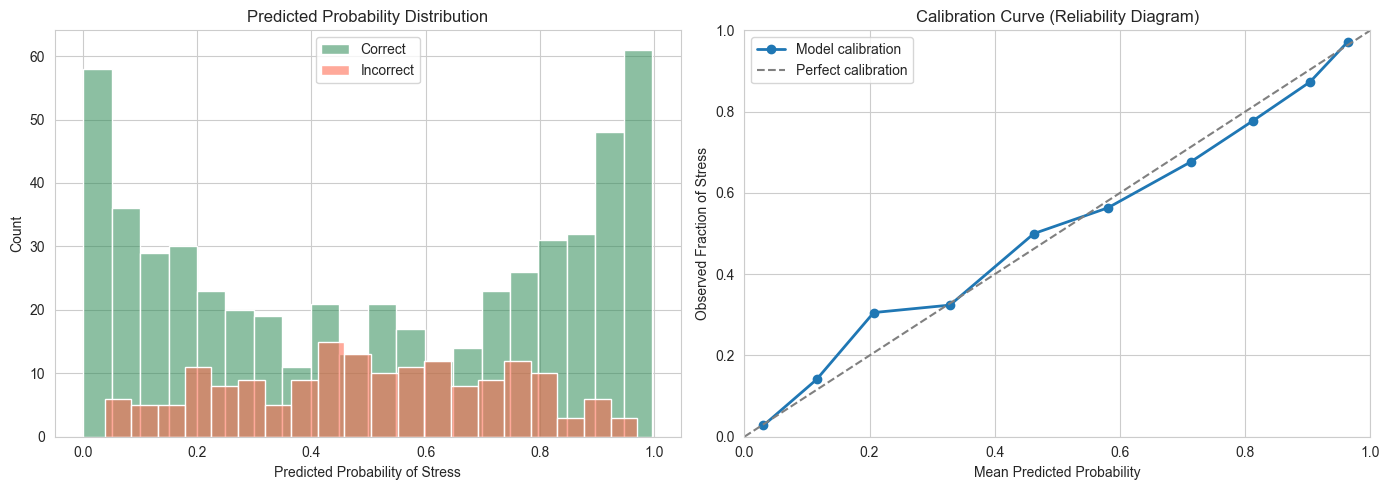

In [68]:
# Auxiliary Analysis: Confidence Calibration & Probability Distribution

if 'best_model' in globals():
    aux_pipeline = best_model
elif 'model_pipeline' in globals():
    aux_pipeline = model_pipeline
elif 'grid_search' in globals() and hasattr(grid_search, 'best_estimator_'):
    aux_pipeline = grid_search.best_estimator_
else:
    raise ValueError('No logistic pipeline found for calibration analysis.')

if 'X_test_raw' in globals():
    aux_X_test = X_test_raw
elif 'X_test_holdout' in globals():
    aux_X_test = X_test_holdout
else:
    raise ValueError('No test feature frame found (expected X_test_raw or X_test_holdout).')

if 'X_train_raw' in globals():
    aux_X_train = X_train_raw
elif 'X_train_cv' in globals():
    aux_X_train = X_train_cv
else:
    raise ValueError('No training feature frame found (expected X_train_raw or X_train_cv).')

if 'y_train' not in globals():
    raise ValueError('y_train is required to fit pipeline when not already fitted.')

try:
    check_is_fitted(aux_pipeline)
except Exception:
    aux_pipeline.fit(aux_X_train, y_train)

y_true_cal = y_test.to_numpy() if hasattr(y_test, 'to_numpy') else np.asarray(y_test)
y_prob_cal = aux_pipeline.predict_proba(aux_X_test)[:, 1]
y_pred_cal = (y_prob_cal >= 0.5).astype(int)
correct_mask = (y_pred_cal == y_true_cal)

brier = brier_score_loss(y_true_cal, y_prob_cal)
frac_pos, mean_pred = calibration_curve(y_true_cal, y_prob_cal, n_bins=10, strategy='quantile')

high_conf_mask = (y_prob_cal < 0.1) | (y_prob_cal > 0.9)
high_conf_error = (~correct_mask[high_conf_mask]).mean() if high_conf_mask.any() else np.nan

print('Calibration summary:')
print(f'- Brier score (lower is better): {brier:.4f}')
print(f'- Mean predicted probability: {y_prob_cal.mean():.4f}')
print(f'- Share of predictions with p<0.1 or p>0.9: {high_conf_mask.mean():.3f}')
print(f'- Error rate for high-confidence predictions: {high_conf_error:.3f}')

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(y_prob_cal[correct_mask], bins=20, color='seagreen', alpha=0.55, label='Correct', ax=axes[0])
sns.histplot(y_prob_cal[~correct_mask], bins=20, color='tomato', alpha=0.55, label='Incorrect', ax=axes[0])
axes[0].set_title('Predicted Probability Distribution')
axes[0].set_xlabel('Predicted Probability of Stress')
axes[0].set_ylabel('Count')
axes[0].legend()

axes[1].plot(mean_pred, frac_pos, marker='o', linewidth=2, label='Model calibration')
axes[1].plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfect calibration')
axes[1].set_title('Calibration Curve (Reliability Diagram)')
axes[1].set_xlabel('Mean Predicted Probability')
axes[1].set_ylabel('Observed Fraction of Stress')
axes[1].set_xlim(0, 1)
axes[1].set_ylim(0, 1)
axes[1].legend()

plt.tight_layout()
plt.show()

The histogram shows that many predictions are concentrated toward the extremes (near 0 or 1), indicating frequent high-confidence outputs. In this run, about **29.5%** of predictions are high confidence (`p < 0.1` or `p > 0.9`).

Incorrect predictions are present across the probability range, but high-confidence mistakes are relatively uncommon here (high-confidence error rate ≈ **4.7%**). The calibration curve is reasonably close to the diagonal in most bins, and the Brier score (**0.1617**) suggests moderate probability quality rather than perfect calibration.

For stress-monitoring deployment, this supports threshold-based triage with caution: confidence can help prioritise cases, but calibration is not perfect, so human review should remain mandatory especially for borderline scores where uncertainty is higher.

### Text Length vs Performance Analysis
Since the model uses TF-IDF, it treats each token independently and does not model long-range structure well. So it is possible that text length may affect performance

Performance by text-length bin:
length_bin   n  accuracy  error_rate  min_words  max_words
     Short 189  0.767196    0.232804         12         65
    Medium 177  0.779661    0.220339         66         81
      Long 174  0.752874    0.247126         82        101
 Very Long 175  0.748571    0.251429        102        268


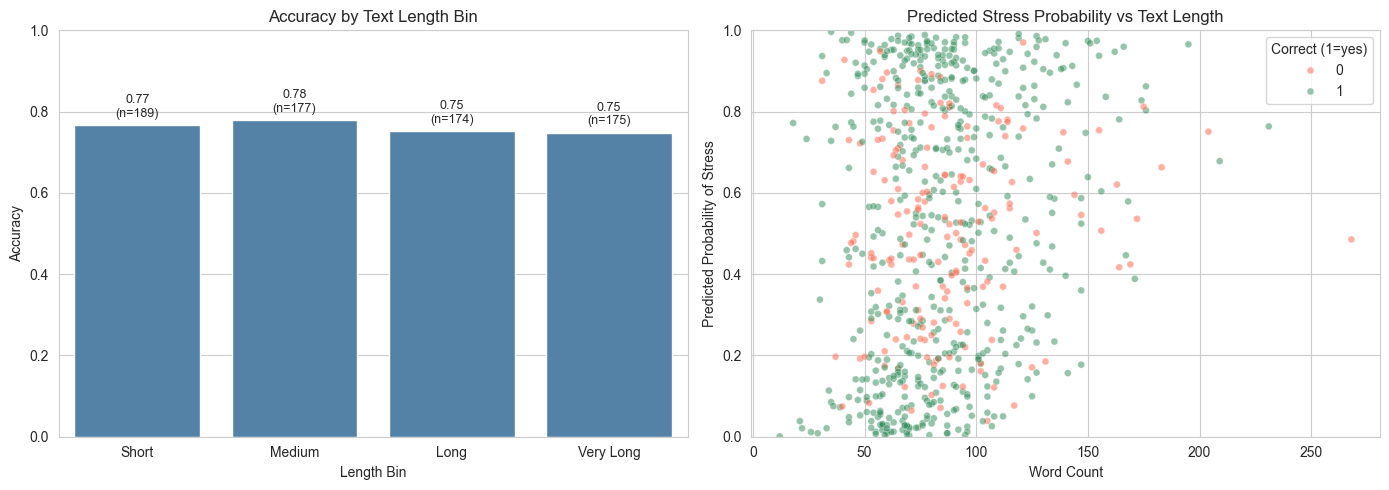

In [69]:
# Auxiliary Analysis: Text Length vs Performance

if 'best_model' in globals():
    aux_pipeline = best_model
elif 'model_pipeline' in globals():
    aux_pipeline = model_pipeline
elif 'grid_search' in globals() and hasattr(grid_search, 'best_estimator_'):
    aux_pipeline = grid_search.best_estimator_
else:
    raise ValueError('No fitted logistic pipeline found for text-length analysis.')

if 'X_test_raw' in globals():
    aux_X_test = X_test_raw.copy()
elif 'X_test_holdout' in globals():
    aux_X_test = X_test_holdout.copy()
else:
    raise ValueError('No test feature frame found (expected X_test_raw or X_test_holdout).')

if 'X_train_raw' in globals():
    aux_X_train = X_train_raw
elif 'X_train_cv' in globals():
    aux_X_train = X_train_cv
else:
    raise ValueError('No training feature frame found (expected X_train_raw or X_train_cv).')

if 'y_train' not in globals():
    raise ValueError('y_train is required to fit pipeline when not already fitted.')

try:
    check_is_fitted(aux_pipeline)
except Exception:
    aux_pipeline.fit(aux_X_train, y_train)

y_true_len = y_test.to_numpy() if hasattr(y_test, 'to_numpy') else np.asarray(y_test)
y_prob_len = aux_pipeline.predict_proba(aux_X_test)[:, 1]
y_pred_len = (y_prob_len >= 0.5).astype(int)

if 'TEXT_COL' in globals() and TEXT_COL in aux_X_test.columns:
    text_series_len = aux_X_test[TEXT_COL].fillna('').astype(str)
elif 'text' in aux_X_test.columns:
    text_series_len = aux_X_test['text'].fillna('').astype(str)
else:
    raise ValueError('Text column not found in test frame.')

word_count = text_series_len.str.split().str.len()

# Build 4 quantile bins with fallback
try:
    length_bin = pd.qcut(word_count, q=4, labels=['Short', 'Medium', 'Long', 'Very Long'], duplicates='drop')
except Exception:
    length_bin = pd.cut(word_count, bins=4, labels=['Short', 'Medium', 'Long', 'Very Long'])

len_df = pd.DataFrame({
    'word_count': word_count,
    'length_bin': length_bin.astype(str),
    'y_true': y_true_len,
    'y_pred': y_pred_len,
    'y_prob': y_prob_len
})
len_df['correct'] = (len_df['y_true'] == len_df['y_pred']).astype(int)

bin_metrics = len_df.groupby('length_bin', observed=True).agg(
    n=('correct', 'size'),
    accuracy=('correct', 'mean'),
    error_rate=('correct', lambda x: 1 - x.mean()),
    avg_words=('word_count', 'mean'),
    min_words=('word_count', 'min'),
    max_words=('word_count', 'max')
).reset_index()

bin_metrics = bin_metrics.sort_values('avg_words')
print('Performance by text-length bin:')
print(bin_metrics[['length_bin', 'n', 'accuracy', 'error_rate', 'min_words', 'max_words']].to_string(index=False))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(data=bin_metrics, x='length_bin', y='accuracy', color='steelblue', ax=axes[0])
axes[0].set_title('Accuracy by Text Length Bin')
axes[0].set_xlabel('Length Bin')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim(0, 1)
for i, row in bin_metrics.reset_index(drop=True).iterrows():
    axes[0].text(i, min(row['accuracy'] + 0.02, 0.98), f"{row['accuracy']:.2f}\n(n={int(row['n'])})", ha='center', fontsize=9)

sample_n = min(2000, len(len_df))
plot_sample = len_df.sample(sample_n, random_state=SEED if 'SEED' in globals() else 42) if len(len_df) > sample_n else len_df
sns.scatterplot(data=plot_sample, x='word_count', y='y_prob', hue='correct',
                palette={1: 'seagreen', 0: 'tomato'}, alpha=0.5, s=25, ax=axes[1])
axes[1].set_title('Predicted Stress Probability vs Text Length')
axes[1].set_xlabel('Word Count')
axes[1].set_ylabel('Predicted Probability of Stress')
axes[1].set_ylim(0, 1)
axes[1].legend(title='Correct (1=yes)')

plt.tight_layout()
plt.show()

Performance varies slightly by length bin. Accuracy is highest for **Medium** posts (~**0.78**), similar for **Short** (~**0.77**), and lower for **Long** (~**0.75**) and **Very Long** (~**0.74**), indicating a mild decline with increasing length.

A plausible model-behavior explanation is that longer posts contain more mixed and context-dependent cues, while logistic regression with TF-IDF uses linear, token-level signals and may not capture long-range narrative structure well.

In practical deployment, this means long-form narratives may need extra caution (for example, stronger human oversight) because reliability appears slightly weaker in the longest bins.

## Concluding Statement

The auxiliary analyses add three grounded insights. **Calibration** is reasonably good but imperfect (Brier ≈ **0.1617**), with high-confidence predictions present and relatively low high-confidence error (~**4.7%**), which supports probability-based triage but not full automation.

**Structural performance** is not uniform: Accuracy declines modestly from medium/short posts (~0.78/0.77) to long/very long posts (~0.75/0.74), suggesting more caution for long narratives where linear token-level models may miss nuanced context.

**Feature reliance** is strongly skewed toward numeric engineered signals (numeric SHAP ratio ~**0.852** vs TF-IDF ~**0.148**), and this pattern appears consistent across samples. This improves transparency by clarifying what the model is actually using, but it also creates dependency risk if numeric feature quality shifts over time.

For a real-world mental health monitoring setting (including Singapore-oriented analysis contexts), the evidence supports a balanced strategy: Use the model for decision support and prioritisation, combine thresholding with human review, and continuously audit calibration, length-specific error patterns, and feature-source drift. The central trade-off remains performance versus interpretability. While linear models provide the transparency required for clinical accountability and ease of audit, they lack the semantic depth to capture the complex, non-linear interactions characteristic of long-form distressed narratives.